# Importing Libraries

In [1]:
import sys
import os
import pandas as pd
import matplotlib.pyplot as plt
import sys, os
from pathlib import Path
from sklearn.ensemble import RandomForestClassifier
import numpy as np

# Add project root to Python path
project_root = os.path.abspath("..")  # if main.ipynb is inside Notebooks/
sys.path.append(project_root)

print(project_root)

print("Working directory:", os.getcwd())
print("Folders:", os.listdir())

c:\Users\dwepp\OneDrive\Documents\4th Year\AISE 4010\Final Project\CNC-Tool-Wear
Working directory: c:\Users\dwepp\OneDrive\Documents\4th Year\AISE 4010\Final Project\CNC-Tool-Wear\Notebooks
Folders: ['main.ipynb', 'transformer_hpo']


# Data Pre-Processing


### Initial Dataset Architecture



The CNC Toolwear Dataset by Sharon Sun was utilized for this study on the appication of Time Series Machine Learning on CNC machining data to predict the successful machining of a particular part. The dataset contains 18 seperate experiments with CNC data taken every 100ms. This data will be pre-processed and trained usng methods explored in the AISE 4010 course to determine the applicability and success of certain time series models.

Below displays a raw experiment as well as the associated measurements taken every time step during the experiment.

In [36]:

from src.data_processing import load_experiments
# displaying experiment 1, 11, and 18 to ensure data loaded in properly
experiments, dftrain = load_experiments()

display(experiments[0].head(6))
display(experiments[10].head(6))
display(experiments[17].head(6))
display(dftrain.head(6))

# display column names for experiment 1 and train.csv
print("\n\nColumn names for experiments:")
print(experiments[0].columns.tolist())
print("\n\nColumn names for train.csv:")
print(dftrain.columns.tolist())

# display info from experiment 1
print("\n\nExperiment 1 info():")
display(experiments[0].info())

# display describe from experiment 1
print("\n\nExperiment 1 describe():")
display(experiments[0].describe())

X1_ActualPosition  X1_ActualVelocity  X1_ActualAcceleration  \
0              198.0                0.0                   0.00   
1              198.0              -10.8                -350.00   
2              196.0              -17.8                  -6.25   
3              194.0              -18.0                   0.00   
4              193.0              -17.9                 -18.80   
5              191.0              -17.6                  81.20   

   X1_CommandPosition  X1_CommandVelocity  X1_CommandAcceleration  \
0               198.0                 0.0                0.000000   
1               198.0               -13.6             -358.000000   
2               196.0               -17.9               -0.000095   
3               194.0               -17.9               -0.000095   
4               192.0               -17.9                0.000095   
5               191.0               -17.9                0.000191   

   X1_CurrentFeedback  X1_DCBusVoltage  X1_OutputCurrent  X1_OutputVoltage  \
0                0.18           0.0207             329.0              2.77   
1              -10.90           0.1860             328.0             23.30   
2               -8.59           0.1400             328.0             30.60   
3               -6.11           0.1300             327.0             30.30   
4               -5.70           0.1140             328.0             30.50   
5               -5.85           0.1280             328.0             30.90   

   ...  S1_CurrentFeedback  S1_DCBusVoltage  S1_OutputCurrent  \
0  ...               0.524     2.740000e-19             329.0   
1  ...              -0.288     2.740000e-19             328.0   
2  ...               0.524     2.740000e-19             328.0   
3  ...              -0.180     2.740000e-19             328.0   
4  ...               0.226     2.740000e-19             328.0   
5  ...               0.821     2.740000e-19             328.0   

   S1_OutputVoltage  S1_OutputPower  S1_SystemInertia  \
0               0.0    6.960000e-07              12.0   
1               0.0   -5.270000e-07              12.0   
2               0.0    9.100000e-07              12.0   
3               0.0    1.070000e-06              12.0   
4               0.0    1.960000e-06              12.0   
5               0.0    0.000000e+00              12.0   

   M1_CURRENT_PROGRAM_NUMBER  M1_sequence_number  M1_CURRENT_FEEDRATE  \
0                        1.0                 0.0                 50.0   
1                        1.0                 4.0                 50.0   
2                        1.0                 7.0                 50.0   
3                        1.0                 7.0                 50.0   
4                        1.0                 7.0                 50.0   
5                        1.0                 7.0                 50.0   

   Machining_Process  
0           Starting  
1               Prep  
2               Prep  
3               Prep  
4               Prep  
5               Prep  

[6 rows x 48 columns]

X1_ActualPosition  X1_ActualVelocity  X1_ActualAcceleration  \
0              162.0              -1.15                   87.5   
1              162.0              -1.35                   87.5   
2              162.0              -1.75                   87.5   
3              161.0              -2.13                   56.3   
4              161.0              -2.20                   68.7   
5              161.0              -2.45                   18.8   

   X1_CommandPosition  X1_CommandVelocity  X1_CommandAcceleration  \
0               162.0               -1.34                   -3.08   
1               162.0               -1.64                   -2.88   
2               162.0               -1.92                   -2.65   
3               161.0               -2.17                   -2.38   
4               161.0               -2.39                   -2.08   
5               161.0               -2.58                   -1.76   

   X1_CurrentFeedback  X1_DCBusVoltage  X1_OutputCurrent  X1_OutputVoltage  \
0               -5.16           0.0750             327.0              6.02   
1               -5.78           0.0898             327.0              7.15   
2               -4.28           0.0684             327.0              6.68   
3               -4.47           0.0783             327.0              7.79   
4               -2.86           0.0762             327.0             10.30   
5               -5.08           0.0914             327.0             10.10   

   ...  S1_CurrentFeedback  S1_DCBusVoltage  S1_OutputCurrent  \
0  ...                13.7            0.806             319.0   
1  ...                22.5            1.010             318.0   
2  ...                20.7            0.946             319.0   
3  ...                16.9            0.758             320.0   
4  ...                20.8            1.040             319.0   
5  ...                17.2            0.859             318.0   

   S1_OutputVoltage  S1_OutputPower  S1_SystemInertia  \
0             118.0           0.153              12.0   
1             121.0           0.194              12.0   
2             115.0           0.182              12.0   
3             120.0           0.145              12.0   
4             121.0           0.201              12.0   
5             116.0           0.162              12.0   

   M1_CURRENT_PROGRAM_NUMBER  M1_sequence_number  M1_CURRENT_FEEDRATE  \
0                        1.0                 2.0                  3.0   
1                        1.0                86.0                  3.0   
2                        1.0                86.0                  3.0   
3                        1.0                86.0                  3.0   
4                        1.0                86.0                  3.0   
5                        1.0                86.0                  3.0   

   Machining_Process  
0               Prep  
1               Prep  
2               Prep  
3               Prep  
4               Prep  
5               Prep  

[6 rows x 48 columns]

X1_ActualPosition  X1_ActualVelocity  X1_ActualAcceleration  \
0              151.0               3.08                    0.0   
1              152.0               3.20                   25.0   
2              152.0               3.20                   50.0   
3              152.0               3.13                   50.0   
4              153.0               2.97                   56.3   
5              153.0               3.00                   56.3   

   X1_CommandPosition  X1_CommandVelocity  X1_CommandAcceleration  \
0               151.0                 3.0                     0.0   
1               152.0                 3.0                     0.0   
2               152.0                 3.0                     0.0   
3               152.0                 3.0                     0.0   
4               153.0                 3.0                     0.0   
5               153.0                 3.0                     0.0   

   X1_CurrentFeedback  X1_DCBusVoltage  X1_OutputCurrent  X1_OutputVoltage  \
0                3.48           0.0684             327.0              8.56   
1                3.09           0.0621             327.0              6.74   
2                3.96           0.0796             327.0              8.78   
3                4.70           0.0946             327.0             10.20   
4                5.97           0.1020             327.0             11.30   
5                5.18           0.0923             327.0              9.55   

   ...  S1_CurrentFeedback  S1_DCBusVoltage  S1_OutputCurrent  \
0  ...                22.1            0.867             323.0   
1  ...                23.7            0.937             324.0   
2  ...                14.9            0.799             323.0   
3  ...                18.2            0.895             323.0   
4  ...                18.4            0.854             324.0   
5  ...                21.0            0.961             323.0   

   S1_OutputVoltage  S1_OutputPower  S1_SystemInertia  \
0             119.0           0.167              12.0   
1             119.0           0.179              12.0   
2             119.0           0.152              12.0   
3             114.0           0.172              12.0   
4             120.0           0.162              12.0   
5             120.0           0.184              12.0   

   M1_CURRENT_PROGRAM_NUMBER  M1_sequence_number  M1_CURRENT_FEEDRATE  \
0                        1.0                 2.0                  3.0   
1                        1.0                20.0                  3.0   
2                        1.0                20.0                  3.0   
3                        1.0                20.0                  3.0   
4                        1.0                20.0                  3.0   
5                        1.0                20.0                  3.0   

   Machining_Process  
0               Prep  
1               Prep  
2               Prep  
3               Prep  
4               Prep  
5               Prep  

[6 rows x 48 columns]

No material  feedrate  clamp_pressure tool_condition machining_finalized  \
0   1      wax         6             4.0         unworn                 yes   
1   2      wax        20             4.0         unworn                 yes   
2   3      wax         6             3.0         unworn                 yes   
3   4      wax         6             2.5         unworn                  no   
4   5      wax        20             3.0         unworn                  no   
5   6      wax         6             4.0           worn                 yes   

  passed_visual_inspection  
0                      yes  
1                      yes  
2                      yes  
3                      NaN  
4                      NaN  
5                       no



Column names for experiments:
['X1_ActualPosition', 'X1_ActualVelocity', 'X1_ActualAcceleration', 'X1_CommandPosition', 'X1_CommandVelocity', 'X1_CommandAcceleration', 'X1_CurrentFeedback', 'X1_DCBusVoltage', 'X1_OutputCurrent', 'X1_OutputVoltage', 'X1_OutputPower', 'Y1_ActualPosition', 'Y1_ActualVelocity', 'Y1_ActualAcceleration', 'Y1_CommandPosition', 'Y1_CommandVelocity', 'Y1_CommandAcceleration', 'Y1_CurrentFeedback', 'Y1_DCBusVoltage', 'Y1_OutputCurrent', 'Y1_OutputVoltage', 'Y1_OutputPower', 'Z1_ActualPosition', 'Z1_ActualVelocity', 'Z1_ActualAcceleration', 'Z1_CommandPosition', 'Z1_CommandVelocity', 'Z1_CommandAcceleration', 'Z1_CurrentFeedback', 'Z1_DCBusVoltage', 'Z1_OutputCurrent', 'Z1_OutputVoltage', 'S1_ActualPosition', 'S1_ActualVelocity', 'S1_ActualAcceleration', 'S1_CommandPosition', 'S1_CommandVelocity', 'S1_CommandAcceleration', 'S1_CurrentFeedback', 'S1_DCBusVoltage', 'S1_OutputCurrent', 'S1_OutputVoltage', 'S1_OutputPower', 'S1_SystemInertia', 'M1_CURRENT_PROGRAM_N

None



Experiment 1 describe():


X1_ActualPosition  X1_ActualVelocity  X1_ActualAcceleration  \
count        1055.000000        1055.000000            1055.000000   
mean          151.998104          -0.514919               4.252891   
std             8.315984           5.875864             103.299534   
min           141.000000         -18.100000           -1090.000000   
25%           145.000000          -5.690000             -37.500000   
50%           151.000000          -0.050000               0.000000   
75%           159.000000           4.140000              37.500000   
max           198.000000          44.900000            1030.000000   

       X1_CommandPosition  X1_CommandVelocity  X1_CommandAcceleration  \
count         1055.000000         1055.000000             1055.000000   
mean           151.999052           -0.516069                0.075188   
std              8.309193            5.871274               81.316778   
min            141.000000          -17.900000             -922.000000   
25%            145.000000           -5.770000                0.000000   
50%            151.000000            0.000000                0.000000   
75%            159.000000            4.280000                0.000000   
max            198.000000           44.700000              937.000000   

       X1_CurrentFeedback  X1_DCBusVoltage  X1_OutputCurrent  \
count         1055.000000      1055.000000       1055.000000   
mean            -0.382762         0.081607        325.875829   
std              4.936649         0.030217          0.576857   
min            -17.000000         0.016300        322.000000   
25%             -4.940000         0.061900        326.000000   
50%             -1.100000         0.085800        326.000000   
75%              4.405000         0.099350        326.000000   
max             19.000000         0.319000        329.000000   

       X1_OutputVoltage  ...  S1_CommandAcceleration  S1_CurrentFeedback  \
count       1055.000000  ...            1.055000e+03         1055.000000   
mean          10.755812  ...            4.739336e-01           20.508831   
std            6.354004  ...            6.871208e+00            5.509617   
min            0.130000  ...           -9.540000e-07           -0.694000   
25%            5.885000  ...            0.000000e+00           18.300000   
50%           12.400000  ...            0.000000e+00           21.000000   
75%           14.000000  ...            0.000000e+00           23.350000   
max           64.800000  ...            1.000000e+02           62.000000   

       S1_DCBusVoltage  S1_OutputCurrent  S1_OutputVoltage  S1_OutputPower  \
count     1.055000e+03        1055.00000       1055.000000     1055.000000   
mean      9.017116e-01         320.18673        114.488227        0.171890   
std       2.162504e-01           2.65724         20.408309        0.037033   
min       2.740000e-19         306.00000          0.000000       -0.000001   
25%       8.375000e-01         318.00000        117.000000        0.159000   
50%       9.280000e-01         321.00000        118.000000        0.178000   
75%       9.950000e-01         322.00000        119.000000        0.191500   
max       2.650000e+00         329.00000        129.000000        0.441000   

       S1_SystemInertia  M1_CURRENT_PROGRAM_NUMBER  M1_sequence_number  \
count            1055.0                     1055.0         1055.000000   
mean               12.0                        1.0           64.144076   
std                 0.0                        0.0           39.669174   
min                12.0                        1.0            0.000000   
25%                12.0                        1.0           29.000000   
50%                12.0                        1.0           65.000000   
75%                12.0                        1.0          100.000000   
max                12.0                        1.0          132.000000   

       M1_CURRENT_FEEDRATE  
count          1055.000000  
mean              8.669194  

### Categorical Encoding and Removing Unwanted Features



*The first step to pre-processing is combining the target.csv metadata and each experiment. The metadata contains the final outcome (successful_part) from each experiment, thus this outcome, experiement_id, as well as the tool_condition used during the experiment were added to each row of the raw data. Note, categorical variables such as tool condition were also converted to binary integers during this concatenation.* 

*Additionally, the columns for M1_CURRENT_PROGRAM_NUMBER, M1_sequence_number, M1_CURRENT_FEEDRATE, Machining_Process were removed as they were deemed unnescasary based off visual inspection (justified later durng Exploratary Data Analysis).*

*The target variable (successful_part) was engineered based off the existing finsished_machining and passed_visual_inspection columns of the metadata. successful_part represents a part that both finished machining and visual inspection.*

In [ ]:
import pandas as pd
from pathlib import Path
from src.data_processing import experiment_encoding

project_root = Path.cwd().parent

# run the encoding (writes files to data/data_id)
experiment_encoding()

# load one encoded experiment
csv_path = project_root / "data" / "data_cleaned" / "experiment_01_cleaned.csv"

experiment_01_cleaned = pd.read_csv(csv_path)
display(experiment_01_cleaned.head(6))


All experiments encoded with successful_part and tool_condition.
c:\Users\dwepp\OneDrive\Documents\4th Year\AISE 4010\Final Project\CNC-Tool-Wear\data\data_cleaned\experiment_01_cleaned.csv


X1_ActualPosition  X1_ActualVelocity  X1_ActualAcceleration  \
0              198.0                0.0                   0.00   
1              198.0              -10.8                -350.00   
2              196.0              -17.8                  -6.25   
3              194.0              -18.0                   0.00   
4              193.0              -17.9                 -18.80   
5              191.0              -17.6                  81.20   

   X1_CommandPosition  X1_CommandVelocity  X1_CommandAcceleration  \
0               198.0                 0.0                0.000000   
1               198.0               -13.6             -358.000000   
2               196.0               -17.9               -0.000095   
3               194.0               -17.9               -0.000095   
4               192.0               -17.9                0.000095   
5               191.0               -17.9                0.000191   

   X1_CurrentFeedback  X1_DCBusVoltage  X1_OutputCurrent  X1_OutputVoltage  \
0                0.18           0.0207             329.0              2.77   
1              -10.90           0.1860             328.0             23.30   
2               -8.59           0.1400             328.0             30.60   
3               -6.11           0.1300             327.0             30.30   
4               -5.70           0.1140             328.0             30.50   
5               -5.85           0.1280             328.0             30.90   

   ...  S1_CurrentFeedback  S1_DCBusVoltage  S1_OutputCurrent  \
0  ...               0.524     2.740000e-19             329.0   
1  ...              -0.288     2.740000e-19             328.0   
2  ...               0.524     2.740000e-19             328.0   
3  ...              -0.180     2.740000e-19             328.0   
4  ...               0.226     2.740000e-19             328.0   
5  ...               0.821     2.740000e-19             328.0   

   S1_OutputVoltage  S1_OutputPower  S1_SystemInertia  successful_part  \
0               0.0    6.960000e-07              12.0                1   
1               0.0   -5.270000e-07              12.0                1   
2               0.0    9.100000e-07              12.0                1   
3               0.0    1.070000e-06              12.0                1   
4               0.0    1.960000e-06              12.0                1   
5               0.0    0.000000e+00              12.0                1   

   tool_condition  experiment_id  time_step  
0               0              1          0  
1               0              1          1  
2               0              1          2  
3               0              1          3  
4               0              1          4  
5               0              1          5  

[6 rows x 48 columns]

### Checking Missing Values

*The next step to pre-processing was to ensure all missing values were removed. The belove function ensures that no missing values are present and in the case of this dataset, no values were missing from the raw dataset. Thus, it was unnescasary to implement any sort of filling or deletion methods.*

In [58]:
from src.data_processing import checking_missing_values

checking_missing_values()

csv_path = project_root / "data" / "data_filtered" / "experiment_01_filtered.csv"

experiment_01_filtered = pd.read_csv(csv_path)
display(experiment_01_filtered.head(6))


Total missing values across all experiments (data_id): 0



S1_ActualPosition  X1_DCBusVoltage  S1_OutputCurrent  X1_OutputPower  \
0             -361.0           0.0207             329.0       -0.000001   
1             -361.0           0.1860             328.0        0.004480   
2             -361.0           0.1400             328.0        0.005330   
3             -361.0           0.1300             328.0        0.004890   
4             -361.0           0.1140             328.0        0.004250   
5             -361.0           0.1280             328.0        0.004740   

   X1_OutputVoltage  X1_OutputCurrent  Y1_OutputCurrent  Y1_DCBusVoltage  \
0              2.77             329.0             328.0           0.0167   
1             23.30             328.0             325.0           0.2810   
2             30.60             328.0             327.0           0.1390   
3             30.30             327.0             325.0           0.1560   
4             30.50             328.0             326.0           0.2020   
5             30.90             328.0             326.0           0.1660   

   Y1_OutputVoltage  X1_CurrentFeedback  ...  Y1_ActualVelocity  \
0              1.84                0.18  ...             -0.025   
1             37.80              -10.90  ...            -19.800   
2             49.40               -8.59  ...            -32.500   
3             47.60               -6.11  ...            -32.600   
4             47.10               -5.70  ...            -32.000   
5             49.60               -5.85  ...            -32.400   

   tool_condition  X1_ActualVelocity  X1_ActualAcceleration  S1_DCBusVoltage  \
0               0                0.0                   0.00     2.740000e-19   
1               0              -10.8                -350.00     2.740000e-19   
2               0              -17.8                  -6.25     2.740000e-19   
3               0              -18.0                   0.00     2.740000e-19   
4               0              -17.9                 -18.80     2.740000e-19   
5               0              -17.6                  81.20     2.740000e-19   

   Y1_ActualPosition  S1_ActualVelocity  successful_part  experiment_id  \
0              158.0              0.001                1              1   
1              158.0              0.000                1              1   
2              154.0              0.000                1              1   
3              151.0             -0.001                1              1   
4              148.0              0.000                1              1   
5              145.0              0.000                1              1   

   time_step  
0          0  
1          1  
2          2  
3          3  
4          4  
5          5  

[6 rows x 28 columns]

### Feature Importance and Selection

*The next step of data pre-processing uses lgb to rudimentary decide the top features of our dataset. The tree structure determines the top 25 features in relation to our target variable successful_part. We then condense our experiments to only contain these top collumns that will be used for model training.*

In [63]:
from src.data_processing import drop_features
import matplotlib.pyplot as plt     

drop_features(top_k=25)

csv_path = project_root / "data" / "data_filtered" / "experiment_01_filtered.csv"

experiment_01_filtered = pd.read_csv(csv_path)
display(experiment_01_filtered.head(6))

All experiments reduced to top 25 features (plus target/metadata).


S1_ActualPosition  X1_DCBusVoltage  S1_OutputCurrent  X1_OutputPower  \
0             -361.0           0.0207             329.0       -0.000001   
1             -361.0           0.1860             328.0        0.004480   
2             -361.0           0.1400             328.0        0.005330   
3             -361.0           0.1300             328.0        0.004890   
4             -361.0           0.1140             328.0        0.004250   
5             -361.0           0.1280             328.0        0.004740   

   X1_OutputVoltage  X1_OutputCurrent  Y1_OutputCurrent  Y1_DCBusVoltage  \
0              2.77             329.0             328.0           0.0167   
1             23.30             328.0             325.0           0.2810   
2             30.60             328.0             327.0           0.1390   
3             30.30             327.0             325.0           0.1560   
4             30.50             328.0             326.0           0.2020   
5             30.90             328.0             326.0           0.1660   

   Y1_OutputVoltage  X1_CurrentFeedback  ...  Y1_ActualVelocity  \
0              1.84                0.18  ...             -0.025   
1             37.80              -10.90  ...            -19.800   
2             49.40               -8.59  ...            -32.500   
3             47.60               -6.11  ...            -32.600   
4             47.10               -5.70  ...            -32.000   
5             49.60               -5.85  ...            -32.400   

   tool_condition  X1_ActualVelocity  X1_ActualAcceleration  S1_DCBusVoltage  \
0               0                0.0                   0.00     2.740000e-19   
1               0              -10.8                -350.00     2.740000e-19   
2               0              -17.8                  -6.25     2.740000e-19   
3               0              -18.0                   0.00     2.740000e-19   
4               0              -17.9                 -18.80     2.740000e-19   
5               0              -17.6                  81.20     2.740000e-19   

   Y1_ActualPosition  S1_ActualVelocity  successful_part  experiment_id  \
0              158.0              0.001                1              1   
1              158.0              0.000                1              1   
2              154.0              0.000                1              1   
3              151.0             -0.001                1              1   
4              148.0              0.000                1              1   
5              145.0              0.000                1              1   

   time_step  
0          0  
1          1  
2          2  
3          3  
4          4  
5          5  

[6 rows x 28 columns]

### Normalization of Data

*After condensing the experiments of the dataset to only the top k features, we must normalize each collumn to help models durng training and prevents features with large numerical values from dominating the feature space. Note, to compute the standard scaler, only the experiements being used for training were combined to prevent data leakage. The standard scaler was then fit, and applied to all experiments individually.*

All experiments normalized using training experiments' stats.


S1_ActualPosition  X1_DCBusVoltage  S1_OutputCurrent  X1_OutputPower  \
0          -0.162644        -1.125819          1.398576       -0.375388   
1          -0.162644         3.165591          1.176210        2.432492   
2          -0.162644         1.971369          1.176210        2.965069   
3          -0.162644         1.711756          1.176210        2.689382   
4          -0.162644         1.296374          1.176210        2.288383   
5          -0.162644         1.659833          1.176210        2.595398   

   X1_OutputVoltage  X1_OutputCurrent  Y1_OutputCurrent  Y1_DCBusVoltage  \
0         -0.649499          1.539201          1.045626        -0.941279   
1          1.993263          0.817670         -0.447319         4.454825   
2          2.932969          0.817670          0.547978         1.555670   
3          2.894351          0.096139         -0.447319         1.902752   
4          2.920097          0.817670          0.050330         2.841915   
5          2.971587          0.817670          0.050330         2.106918   

   Y1_OutputVoltage  X1_CurrentFeedback  ...  Y1_ActualVelocity  \
0         -0.589439            0.146253  ...           0.063519   
1          3.519664           -2.505476  ...          -3.179973   
2          4.845181           -1.952633  ...          -5.263024   
3          4.639497           -1.359105  ...          -5.279426   
4          4.582362           -1.260982  ...          -5.181015   
5          4.868034           -1.296881  ...          -5.246622   

   tool_condition  X1_ActualVelocity  X1_ActualAcceleration  S1_DCBusVoltage  \
0       -0.645418           0.050174              -0.001308        -1.489171   
1       -0.645418          -1.866558              -3.901608        -1.489171   
2       -0.645418          -3.108885              -0.070956        -1.489171   
3       -0.645418          -3.144380              -0.001308        -1.489171   
4       -0.645418          -3.126632              -0.210810        -1.489171   
5       -0.645418          -3.073390               0.903562        -1.489171   

   Y1_ActualPosition  S1_ActualVelocity  successful_part  experiment_id  \
0           1.773375          -1.590659                1              1   
1           1.773375          -1.590700                1              1   
2           1.645245          -1.590700                1              1   
3           1.549147          -1.590742                1              1   
4           1.453049          -1.590700                1              1   
5           1.356951          -1.590700                1              1   

   time_step  
0          0  
1          1  
2          2  
3          3  
4          4  
5          5  

[6 rows x 28 columns]

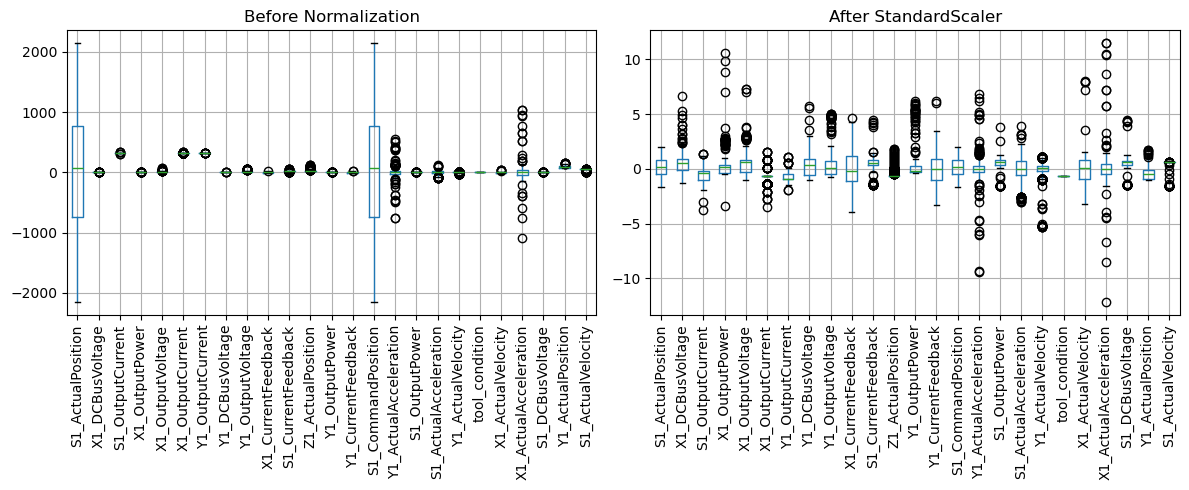

In [61]:
from src.data_processing import normalize_filtered
import matplotlib.pyplot as plt

normalize_filtered()

csv_path = project_root / "data" / "data_normalized" / "experiment_01_normalized.csv"

experiment_01_normalized = pd.read_csv(csv_path)
display(experiment_01_normalized.head(6))

before = pd.read_csv(project_root / "data/data_filtered/experiment_01_filtered.csv")
after  = pd.read_csv(project_root / "data/data_normalized/experiment_01_normalized.csv")

num_cols = before.select_dtypes(include="number").columns[:-3]

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
before[num_cols].boxplot()
plt.title("Before Normalization")
plt.xticks(rotation=90)

plt.subplot(1,2,2)
after[num_cols].boxplot()
plt.title("After StandardScaler")
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

### Windowing of Experiments

*The last step to data preprocessing for our time-series models is the windowing of data. Since the dataset is split into multiple experiments, we need to ensure windows do not cross between two different experiments as this breaks the time series relationship we want to preserve. Thus, experiements are divided into groups for training, testing, and validation. Then they are windowed individually on their own to ensure no cross contamination of windows. Lastly, the windows of each experiment are concatanated to one csv for training, testing, and validation.* 

In [64]:
from src.data_processing import make_windowed_datasets

make_windowed_datasets()

csv_path = project_root / "data" / "data_windowed_csv" / "test_windows_w10.csv"

test_df = pd.read_csv(csv_path)
display(test_df.head(6))


Saved windowed datasets:
   C:\Users\dwepp\OneDrive\Documents\4th Year\AISE 4010\Final Project\CNC-Tool-Wear\data\data_windowed_csv\train_windows_w10.csv
   C:\Users\dwepp\OneDrive\Documents\4th Year\AISE 4010\Final Project\CNC-Tool-Wear\data\data_windowed_csv\val_windows_w10.csv
   C:\Users\dwepp\OneDrive\Documents\4th Year\AISE 4010\Final Project\CNC-Tool-Wear\data\data_windowed_csv\test_windows_w10.csv


S1_ActualPosition_t0  X1_DCBusVoltage_t0  S1_OutputCurrent_t0  \
0             -1.087214            1.036761             0.286749   
1             -1.078724            0.743398             0.509115   
2             -1.078724            0.865416            -0.825077   
3             -1.070234            0.244940             0.286749   
4             -1.070234            0.244940             0.286749   
5             -1.061744            0.252728            -0.825077   

   X1_OutputPower_t0  X1_OutputVoltage_t0  X1_OutputCurrent_t0  \
0           0.000185             0.358433             0.096139   
1          -0.018612             0.332687             0.096139   
2           0.002065             0.294069             0.096139   
3          -0.090040             0.155044             0.096139   
4          -0.088787             0.109990             0.096139   
5          -0.080015             0.125437             0.096139   

   Y1_OutputCurrent_t0  Y1_DCBusVoltage_t0  Y1_OutputVoltage_t0  \
0              0.05033            0.408258            -0.147219   
1              0.05033            0.736965             0.020756   
2              0.05033            0.716548            -0.071802   
3              0.05033            0.434799            -0.163217   
4              0.05033            0.434799            -0.060375   
5              0.05033            0.743090            -0.046663   

   X1_CurrentFeedback_t0  ...  S1_ActualAcceleration_t9  Y1_ActualVelocity_t9  \
0              -1.306454  ...                  0.713381              0.051217   
1              -1.292094  ...                 -1.258194              0.063519   
2              -1.440476  ...                  0.235969              0.075820   
3              -0.827802  ...                  0.391105              0.067619   
4              -0.808656  ...                 -0.958034              0.063519   
5              -0.892420  ...                  1.917180              0.063519   

   tool_condition_t9  X1_ActualVelocity_t9  X1_ActualAcceleration_t9  \
0          -0.645418             -0.464504                 -0.001308   
1          -0.645418              0.609222                 -0.001308   
2          -0.645418              0.582600                 -0.558494   
3          -0.645418              0.609222                  0.486787   
4          -0.645418              0.587924                  0.208194   
5          -0.645418              0.587924                  0.486787   

   S1_DCBusVoltage_t9  Y1_ActualPosition_t9  S1_ActualVelocity_t9  \
0            0.460647             -0.420862              0.639402   
1            0.627260             -0.353593              0.631050   
2            0.321053             -0.353593              0.639402   
3            0.530444             -0.353593              0.635226   
4            0.588984             -0.353593              0.635226   
5            0.174704             -0.353593              0.643579   

   successful_part  experiment_id  
0                1             17  
1                1             17  
2                1             17  
3                1             17  
4                1             17  
5                1             17  

[6 rows x 252 columns]

# Exploratory Data Analysis

## Displaying Worn or Unworn Values for Raw Data

Displaying unworn or worn values for the raw data will help us get a visualization, showing what experiments are taken with a worn vs unworn cutting tool.  

Text(0.5, 1.0, 'Worn vs Unworn Experiments')

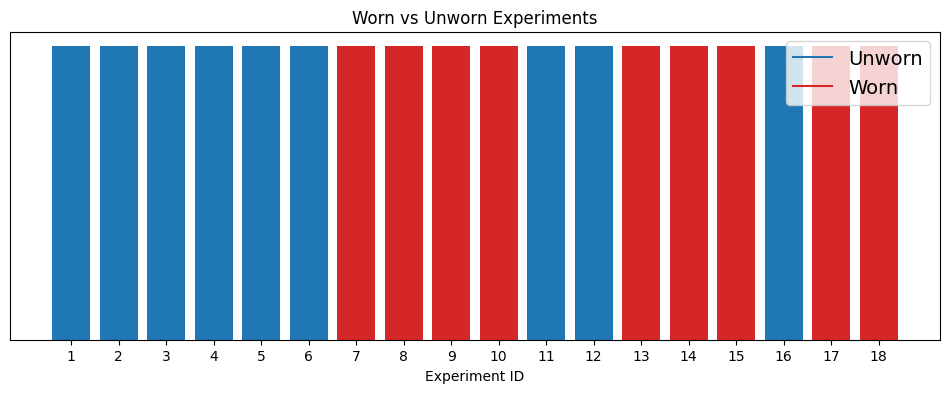

In [ ]:
experiment_ids = list(range(1, 19))

# Replace these with your true labels
conditions = [
    "unworn", "unworn", "unworn", "unworn", "unworn", "unworn",
    "worn", "worn", "worn", "worn", "unworn", "unworn",
    "worn", "worn", "worn", 
    "unworn", "worn", "worn"
]

# Convert to colors
colors = ["tab:blue" if c == "unworn" else "tab:red" for c in conditions]

plt.figure(figsize=(12,4))
plt.bar(experiment_ids, [1]*18, color=colors)
plt.plot([], [], color="tab:blue", label="Unworn")
plt.plot([], [], color="tab:red", label="Worn")
plt.legend(fontsize=14, markerscale=2)

plt.xticks(experiment_ids)
plt.yticks([])  # hide y-axis
plt.xlabel("Experiment ID")
plt.title("Worn vs Unworn Experiments")

## Raw Data Visualization for Raw Data
In the raw data visualization, since there are 48 columns and 18 experiments there would be way too many plots for each feature.  For this reason we will only be plotting the features that respond most to tool wear. 

Raw Features that will be plotted:

Velocity:
Shows how fast each axis or the spindle is moving, revealing cutting regions, transitions, and motion patterns.

- X1_ActualVelocity
- Y1_ActualVelocity
- Z1_ActualVelocity
- S1_ActualVelocity

Output Power:
Indicates the mechanical load on the motors, which increases when the tool is worn or cutting heavily.

- X1_OutputPower
- Y1_OutputPower
- S1_OutputPower

Current Feedback:
Measures actual motor torque, directly reflecting cutting force and tool engagement.

- X1_FeedbackCurrent
- Y1_FeedbackCurrent
- Z1_FeedbackCurrent
- S1_FeedbackCurrent

Acceleration:
Highlights rapid motion changes or vibration, which can increase with tool wear.

- X1_ActualAcceleration
- Z1_ActualAcceleration

Position:
Provides context for where the tool is in the toolpath during different cutting events.

- S1_ActualPosition
- X1_ActualPosition
- Y1_ActualPosition

Machining Controller Channel:

- M1_CURRENT_FEEDRATE: Shows the feedrate being applied, which affects cutting force and load.
- M1_sequence_number: Identifies which G-code instruction is running at each moment.
- M1_CURRENT_PROGRAM_NUMBER: Indicates the machining program in use, helping match data to machining stages.




In [ ]:
project_root = Path(r"C:\Users\aaron\OneDrive\Documents\Year 4\AISE 4010A\Project\CNC-Tool-Wear")
src_path = project_root / "src"

sys.path.insert(0, str(src_path))
from src.utils import plot_time_all_experiments

Saved:
   C:\Users\aaron\OneDrive\Documents\Year 4\AISE 4010A\Project\CNC-Tool-Wear\data\data_windowed_csv\train_windows_w10.csv
   C:\Users\aaron\OneDrive\Documents\Year 4\AISE 4010A\Project\CNC-Tool-Wear\data\data_windowed_csv\val_windows_w10.csv
   C:\Users\aaron\OneDrive\Documents\Year 4\AISE 4010A\Project\CNC-Tool-Wear\data\data_windowed_csv\test_windows_w10.csv


## Plotting Average Velocity vs Time

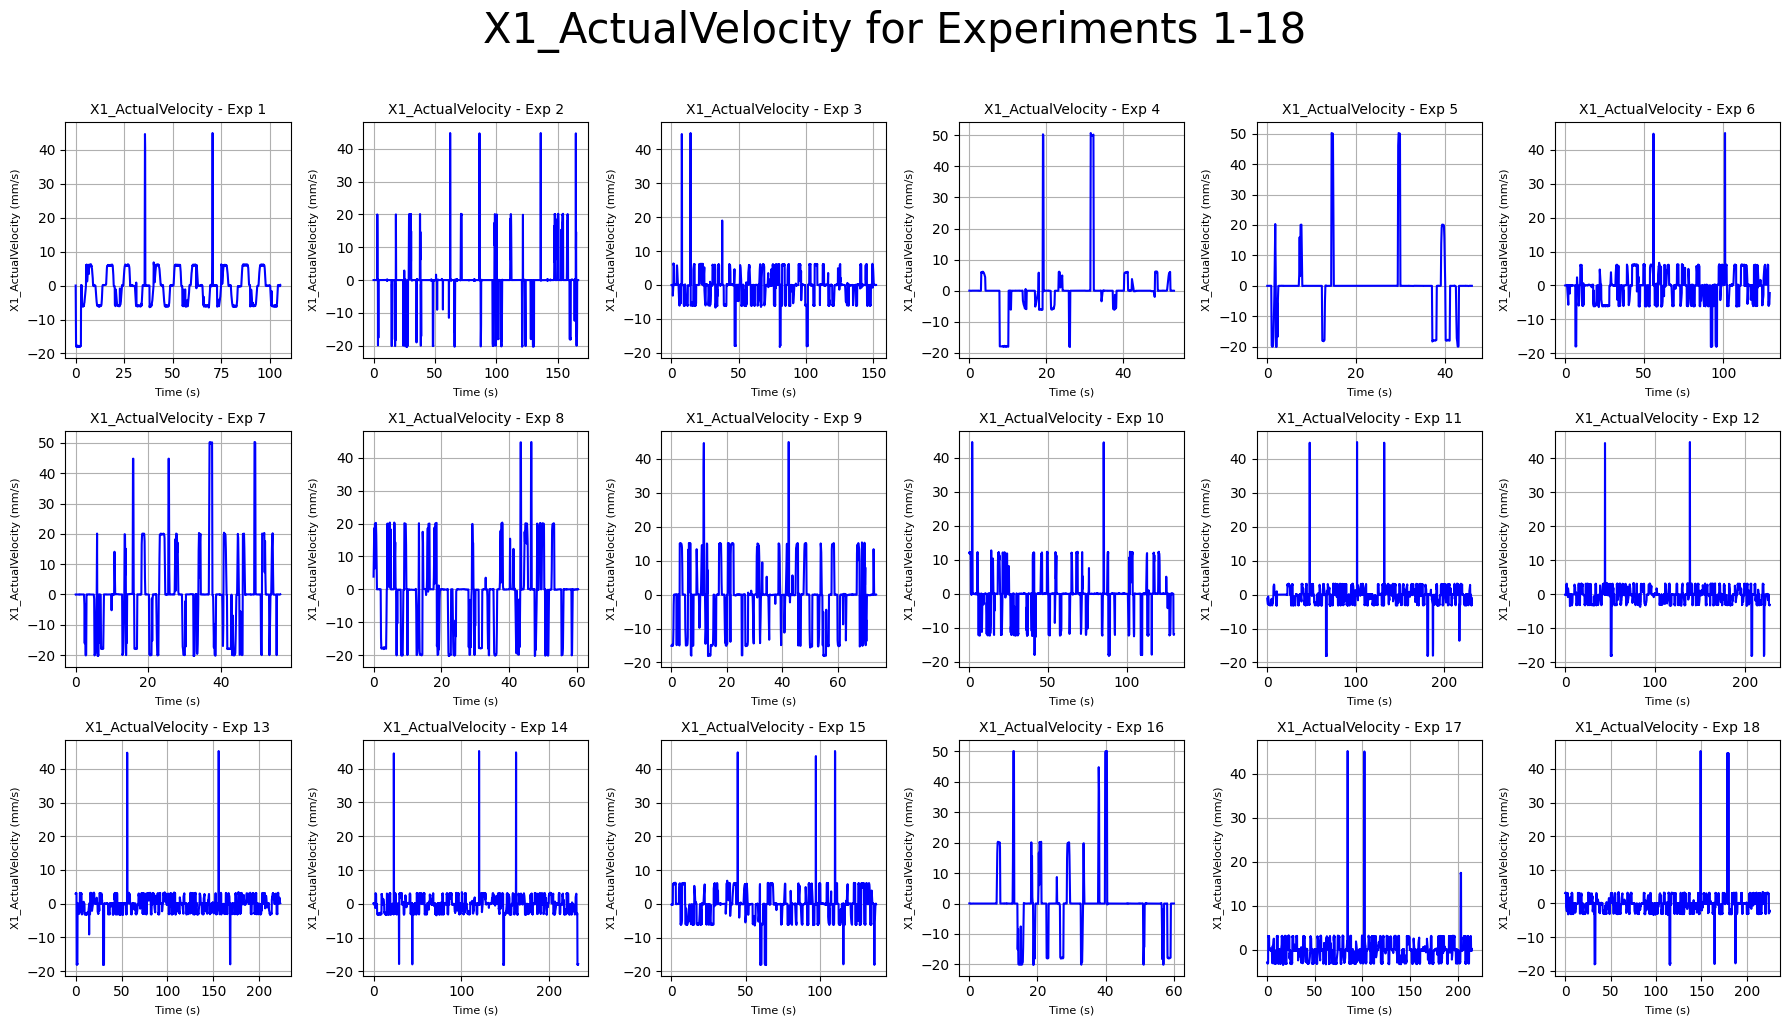

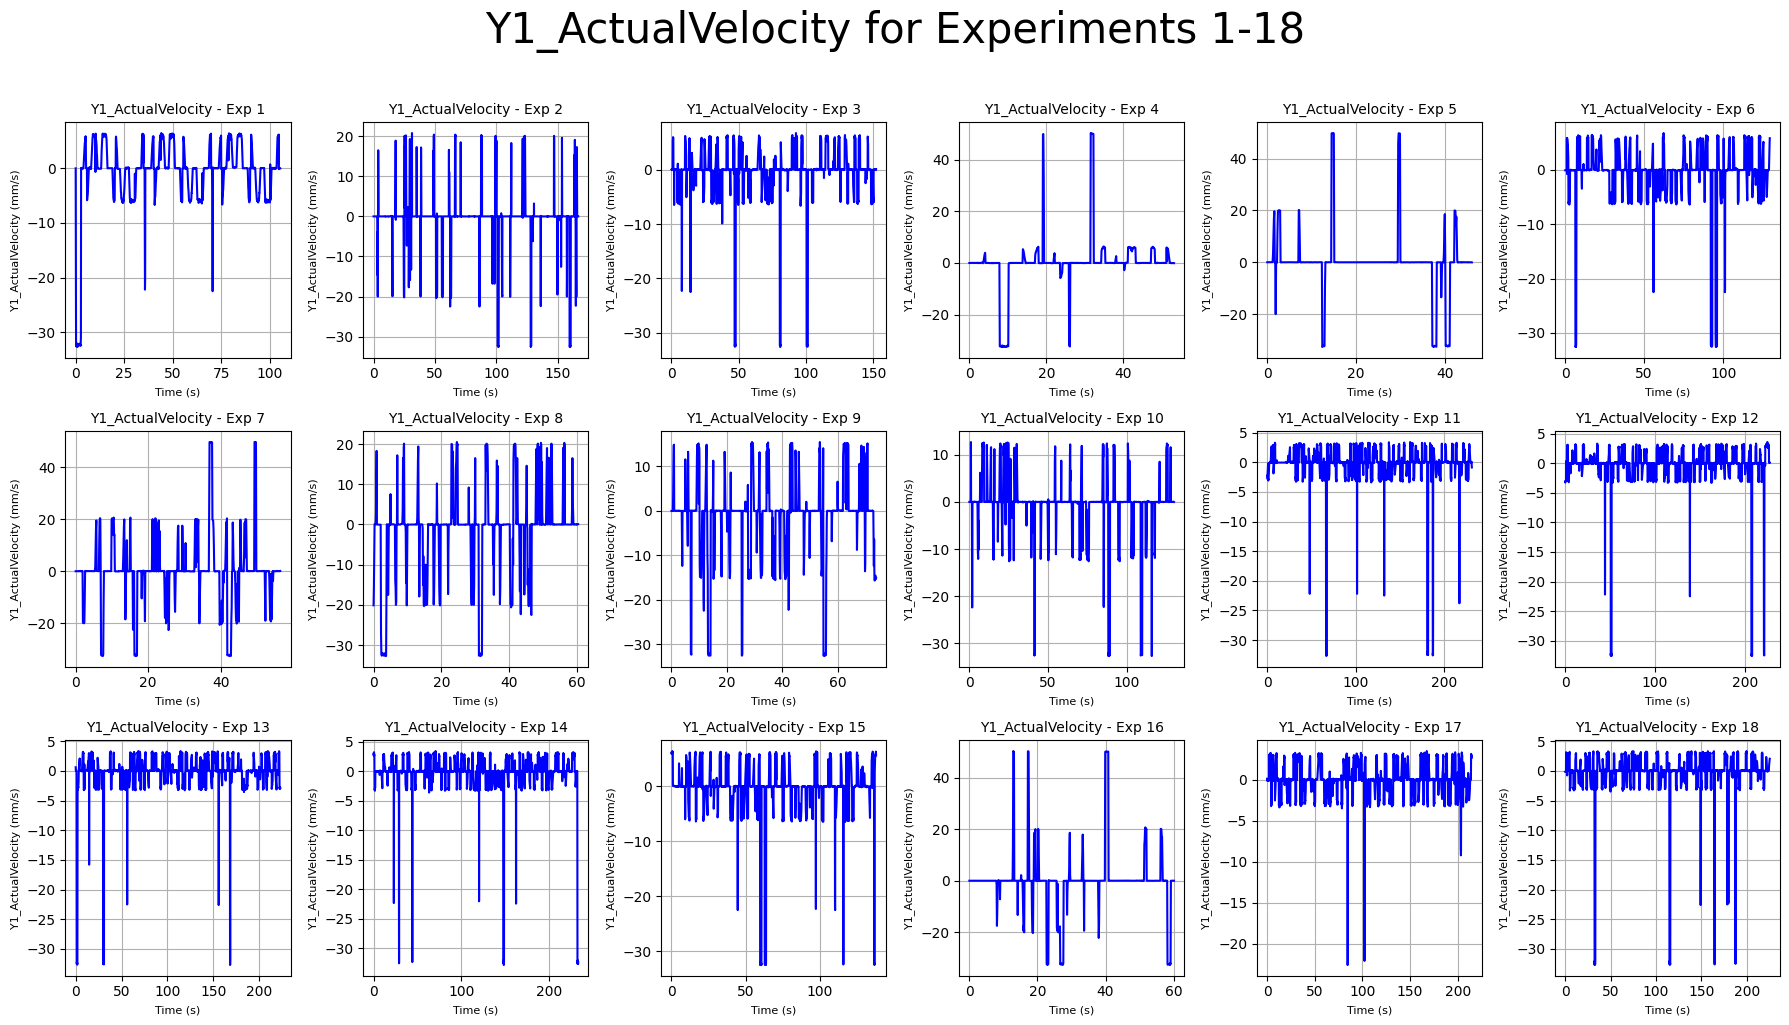

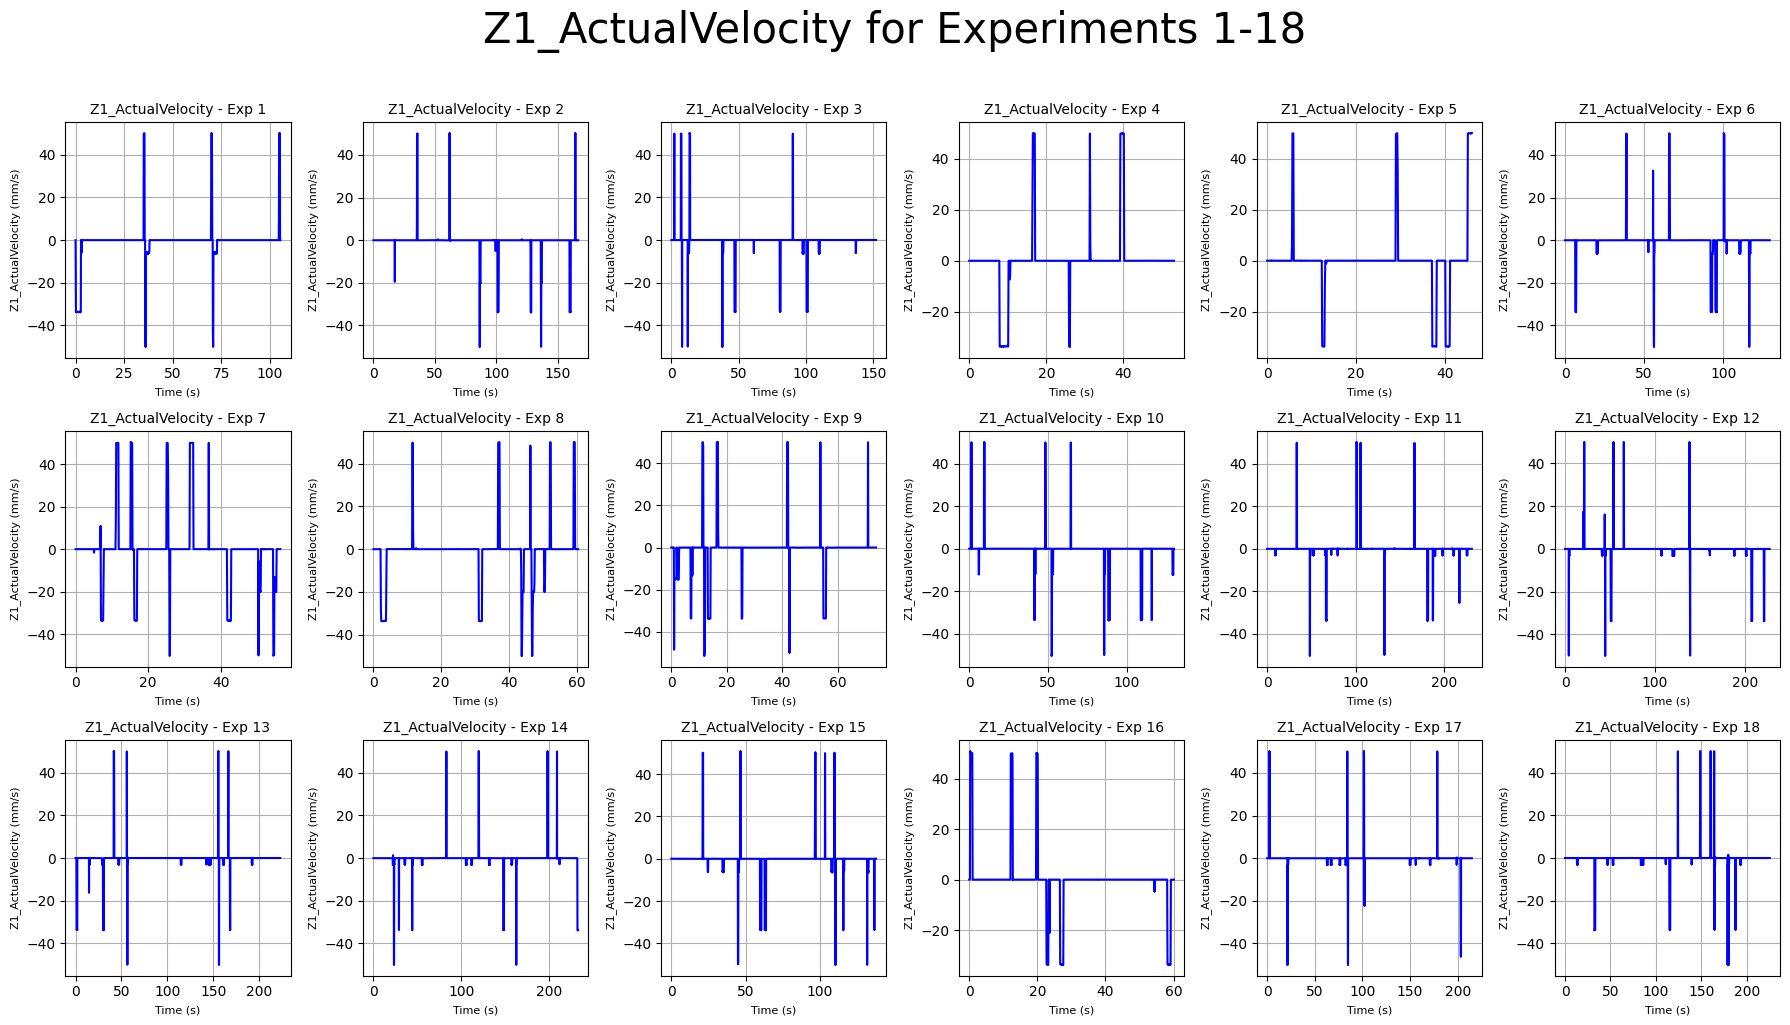

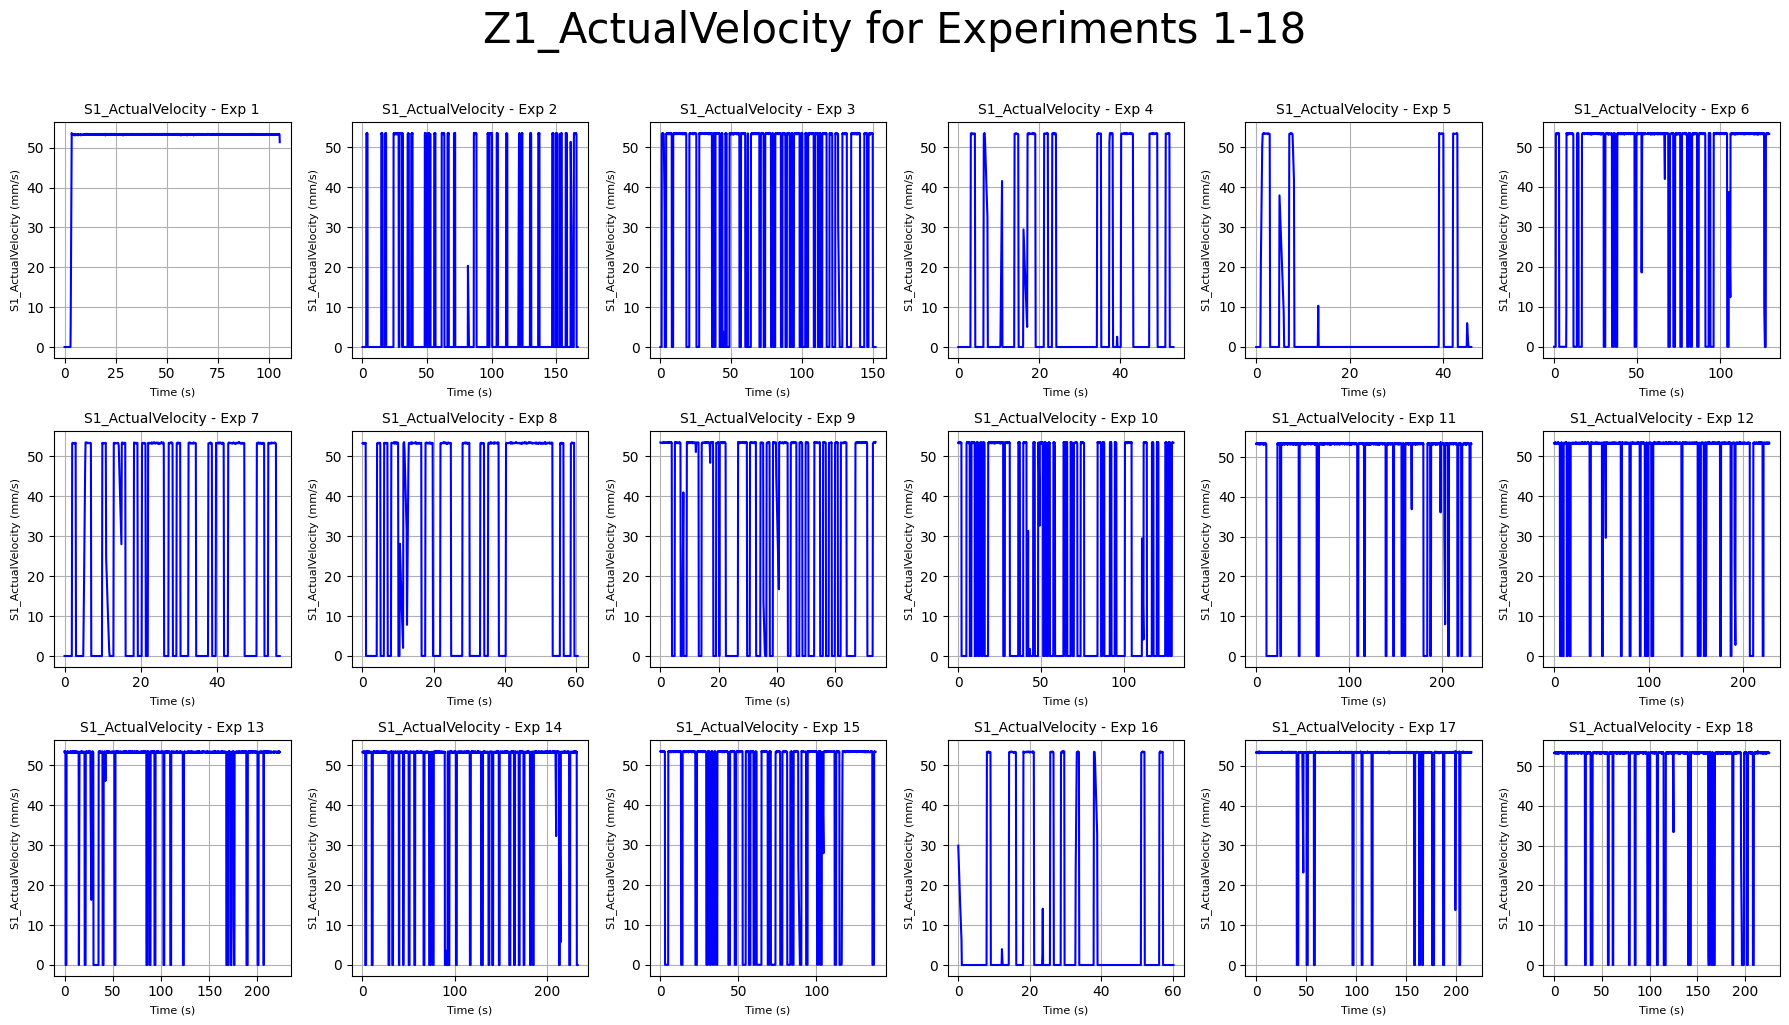

In [ ]:
plot_time_all_experiments(experiments, "X1_ActualVelocity", "X1_ActualVelocity (mm/s)", "blue", "X1_ActualVelocity for Experiments 1-18")
plot_time_all_experiments(experiments, "Y1_ActualVelocity", "Y1_ActualVelocity (mm/s)", "blue","Y1_ActualVelocity for Experiments 1-18")
plot_time_all_experiments(experiments, "Z1_ActualVelocity", "Z1_ActualVelocity (mm/s)", "blue", "Z1_ActualVelocity for Experiments 1-18")
plot_time_all_experiments(experiments, "S1_ActualVelocity", "S1_ActualVelocity (mm/s)", "blue","Z1_ActualVelocity for Experiments 1-18")
 


## Plotting Output Power vs Time

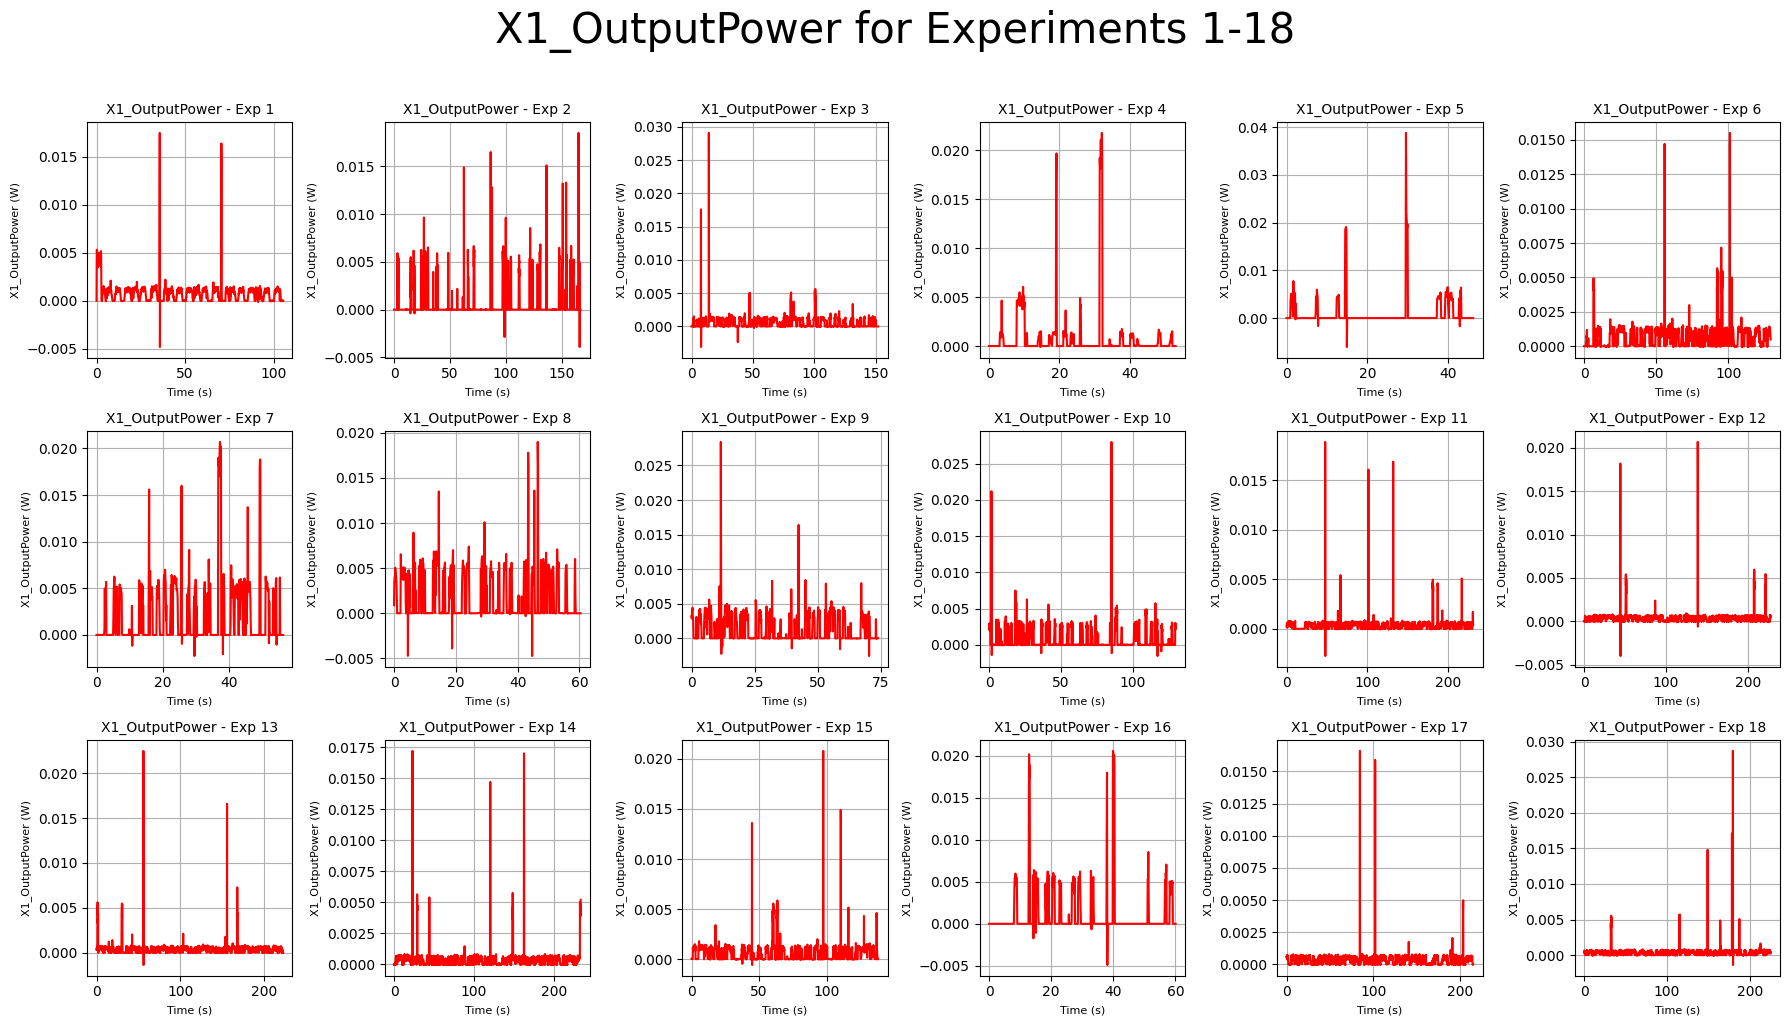

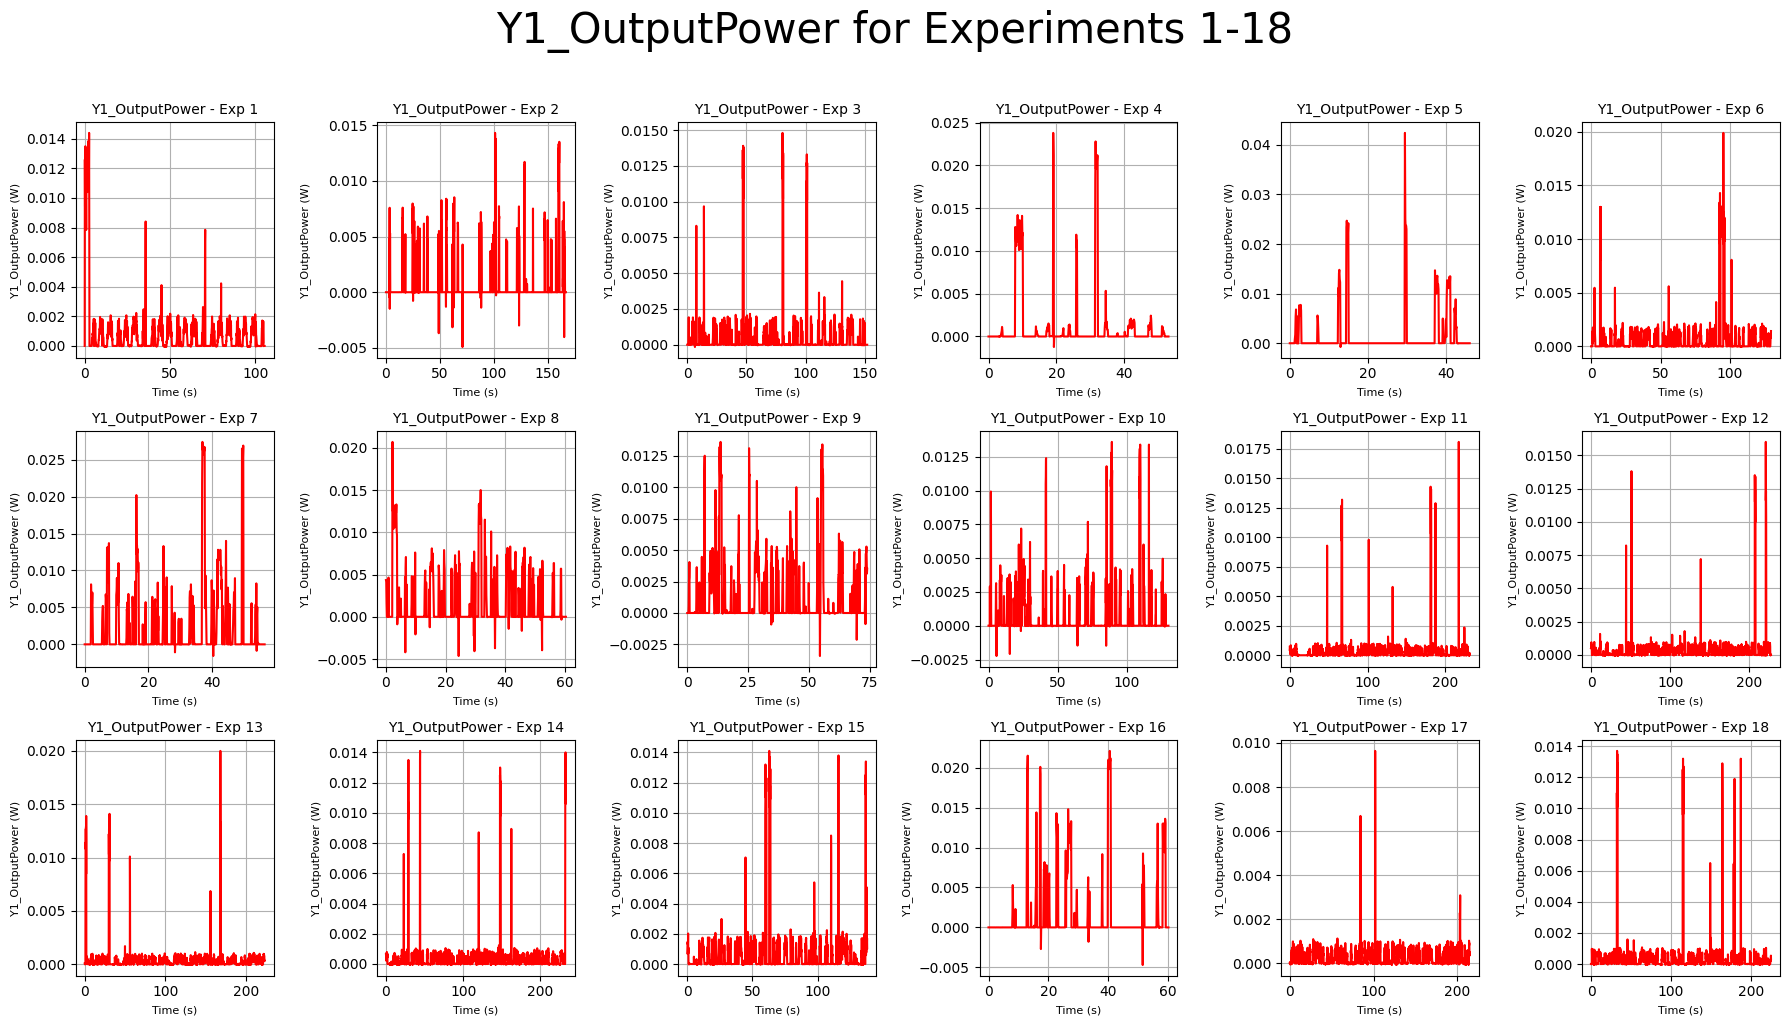

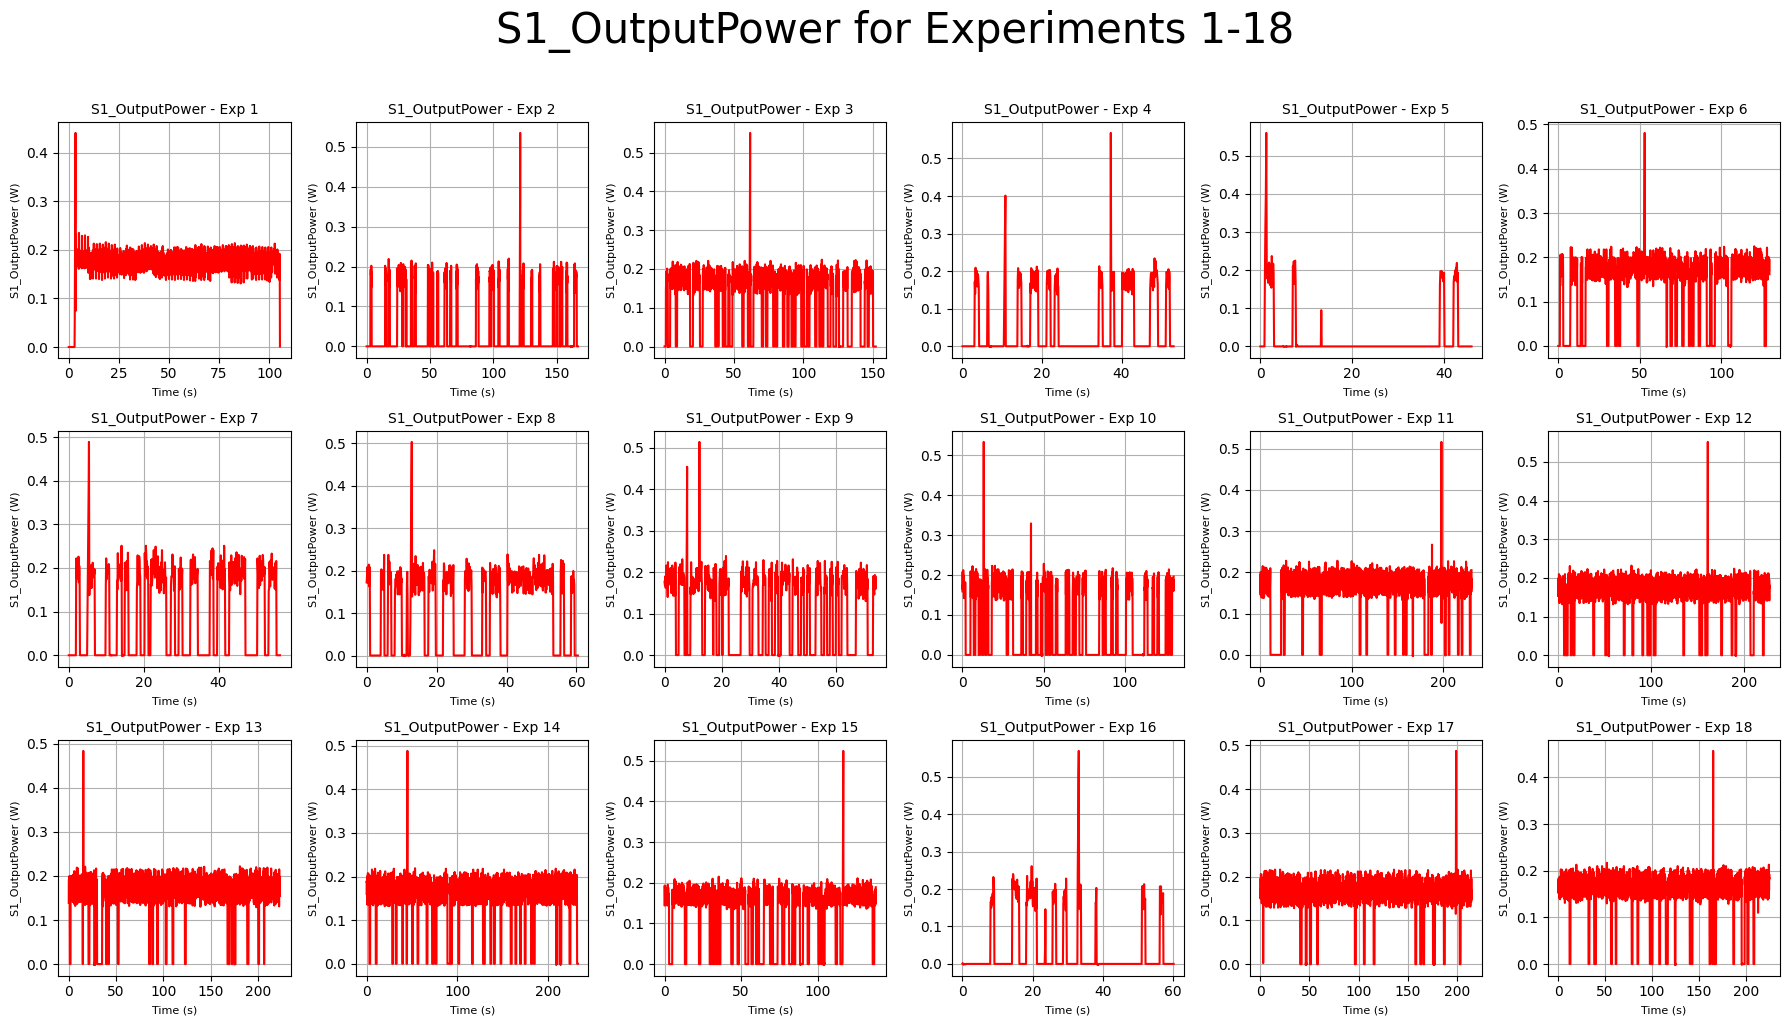

In [ ]:
plot_time_all_experiments(experiments, "X1_OutputPower", "X1_OutputPower (W)", "red", "X1_OutputPower for Experiments 1-18")
plot_time_all_experiments(experiments, "Y1_OutputPower", "Y1_OutputPower (W)", "red", "Y1_OutputPower for Experiments 1-18")
plot_time_all_experiments(experiments, "S1_OutputPower", "S1_OutputPower (W)", "red", "S1_OutputPower for Experiments 1-18")



## Plotting Current Feedback vs Time

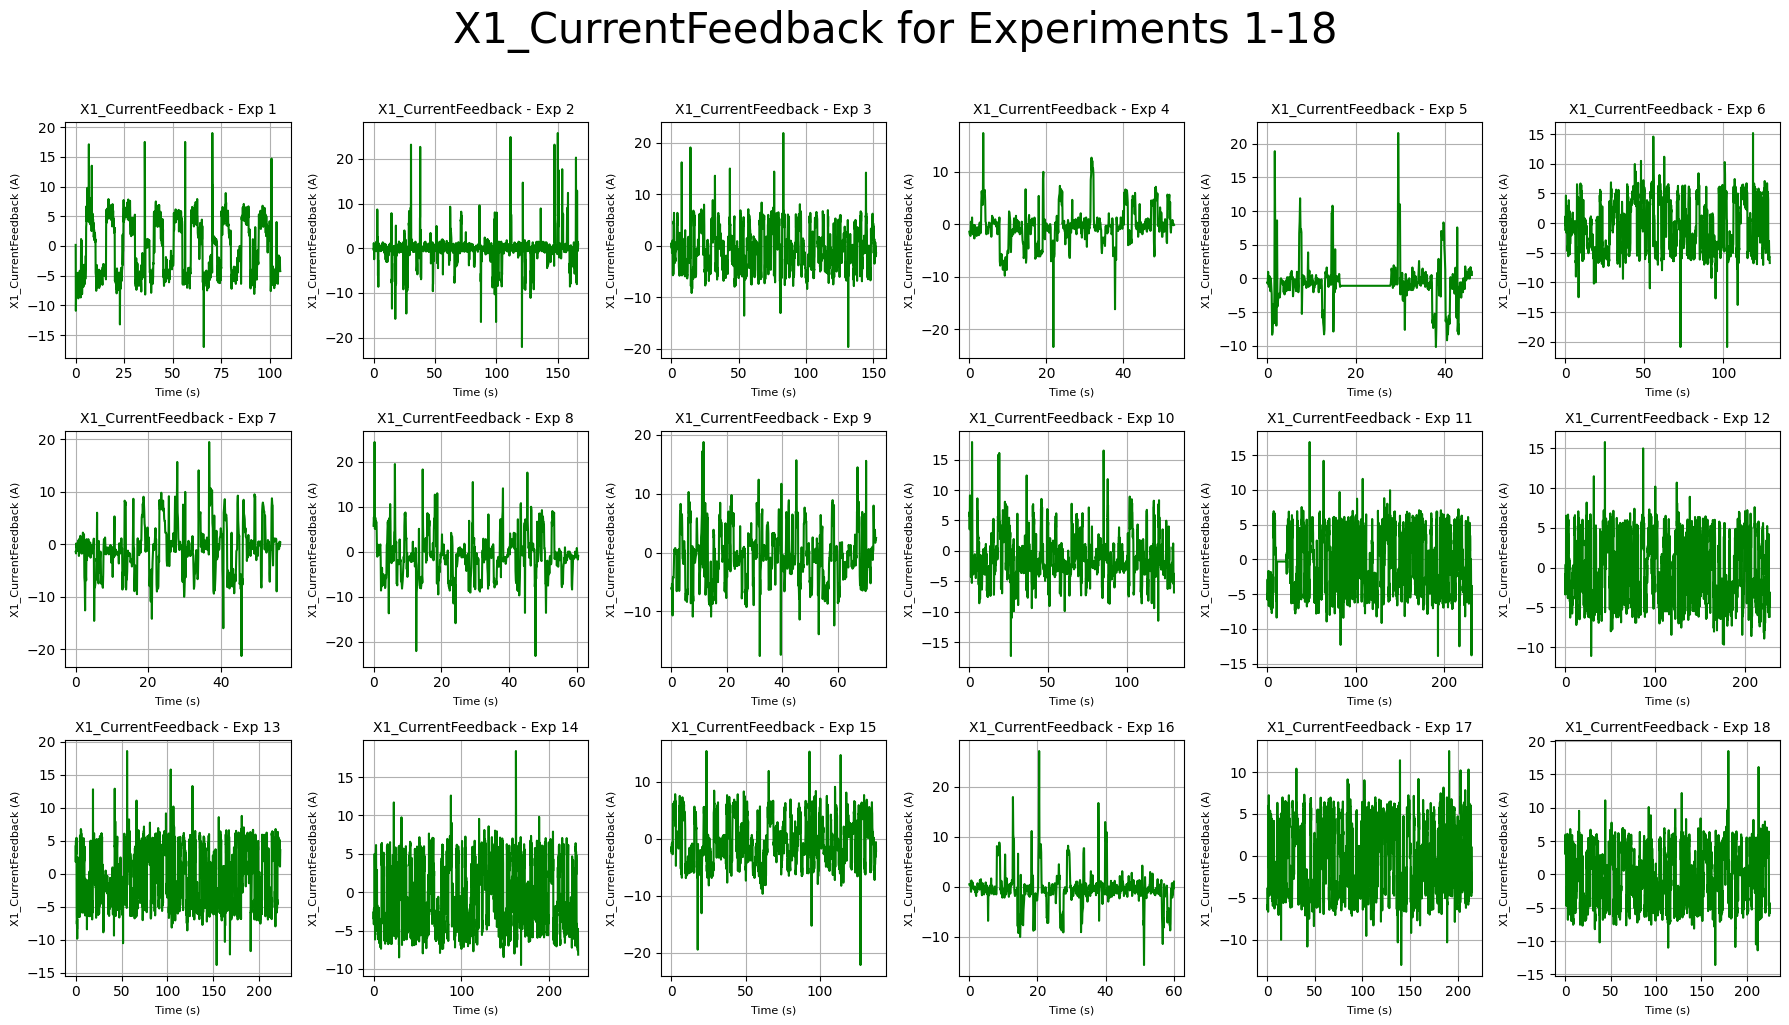

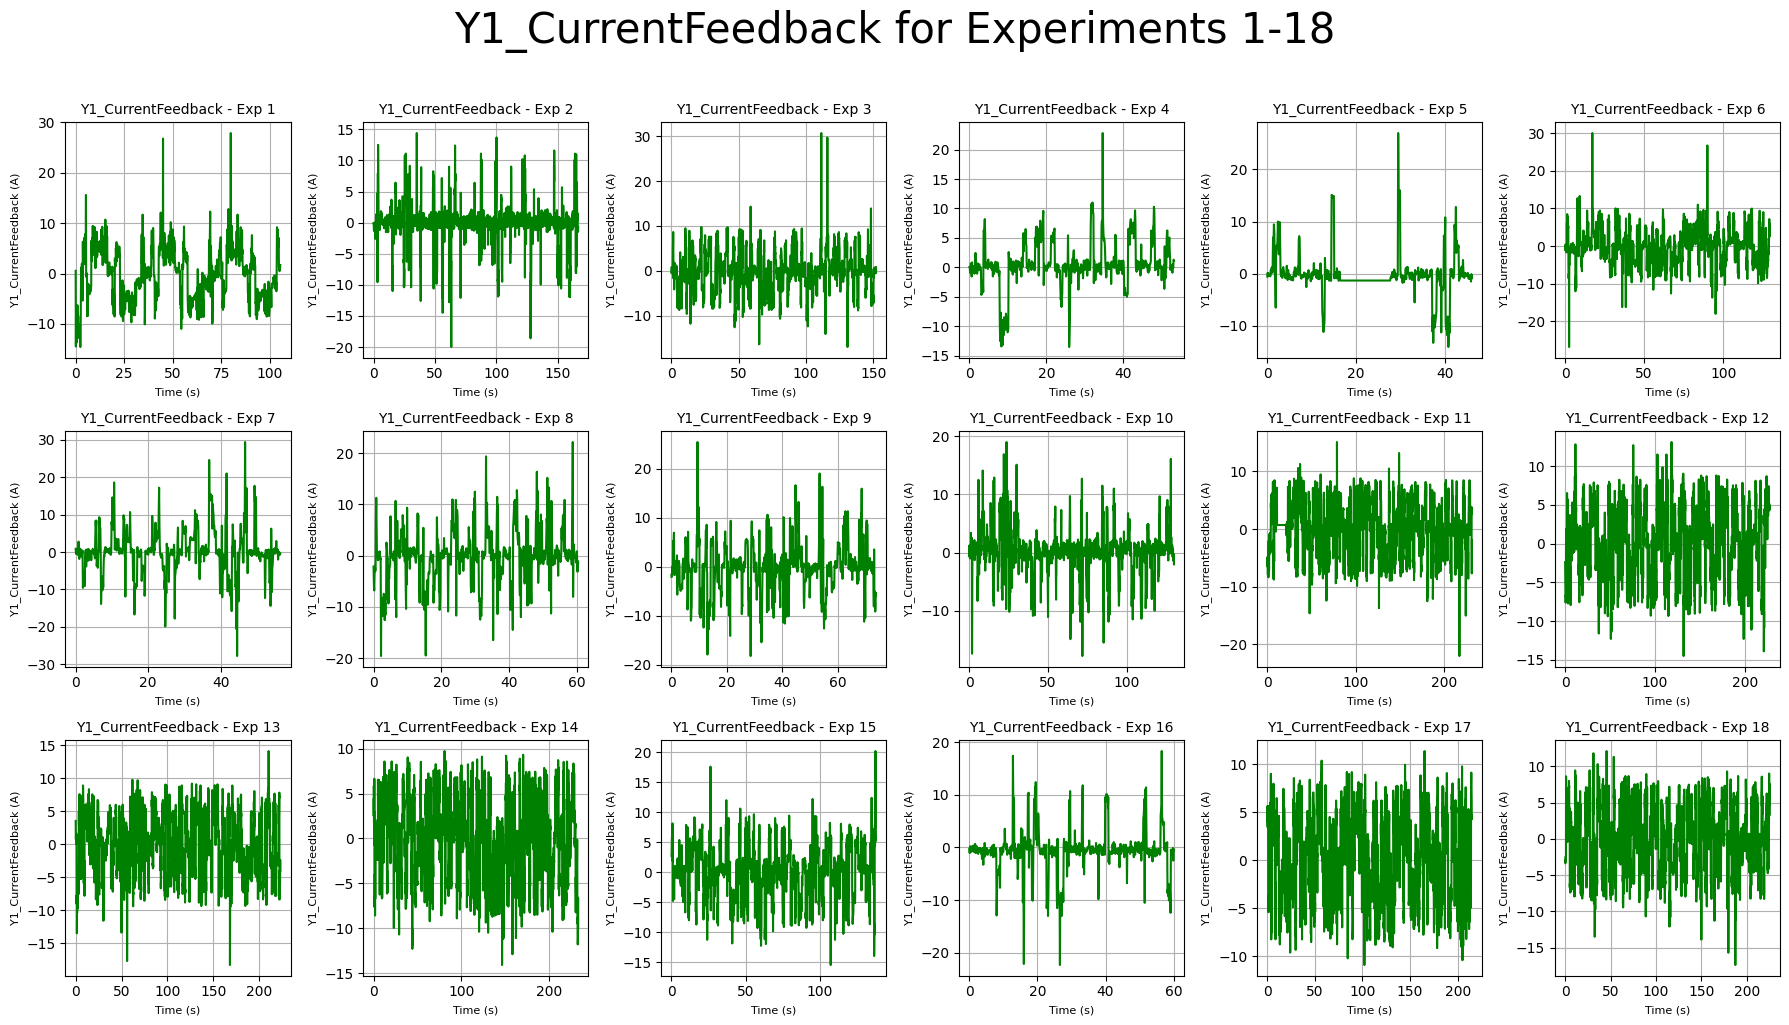

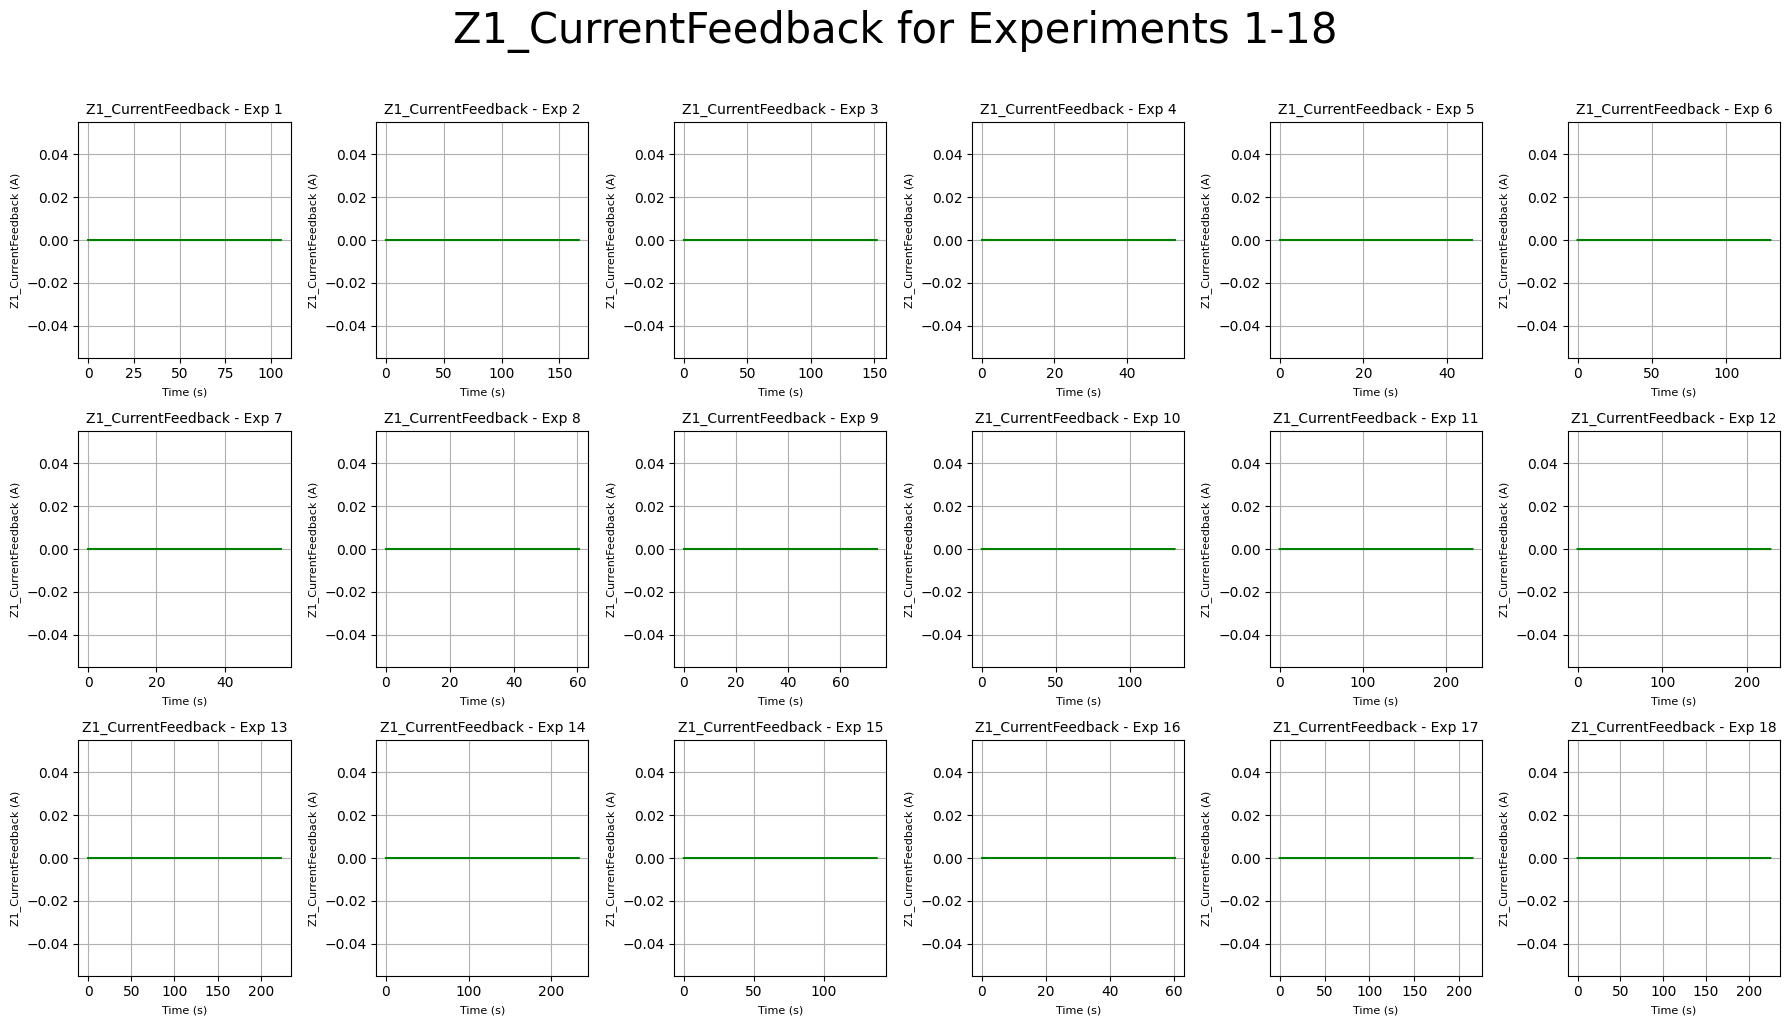

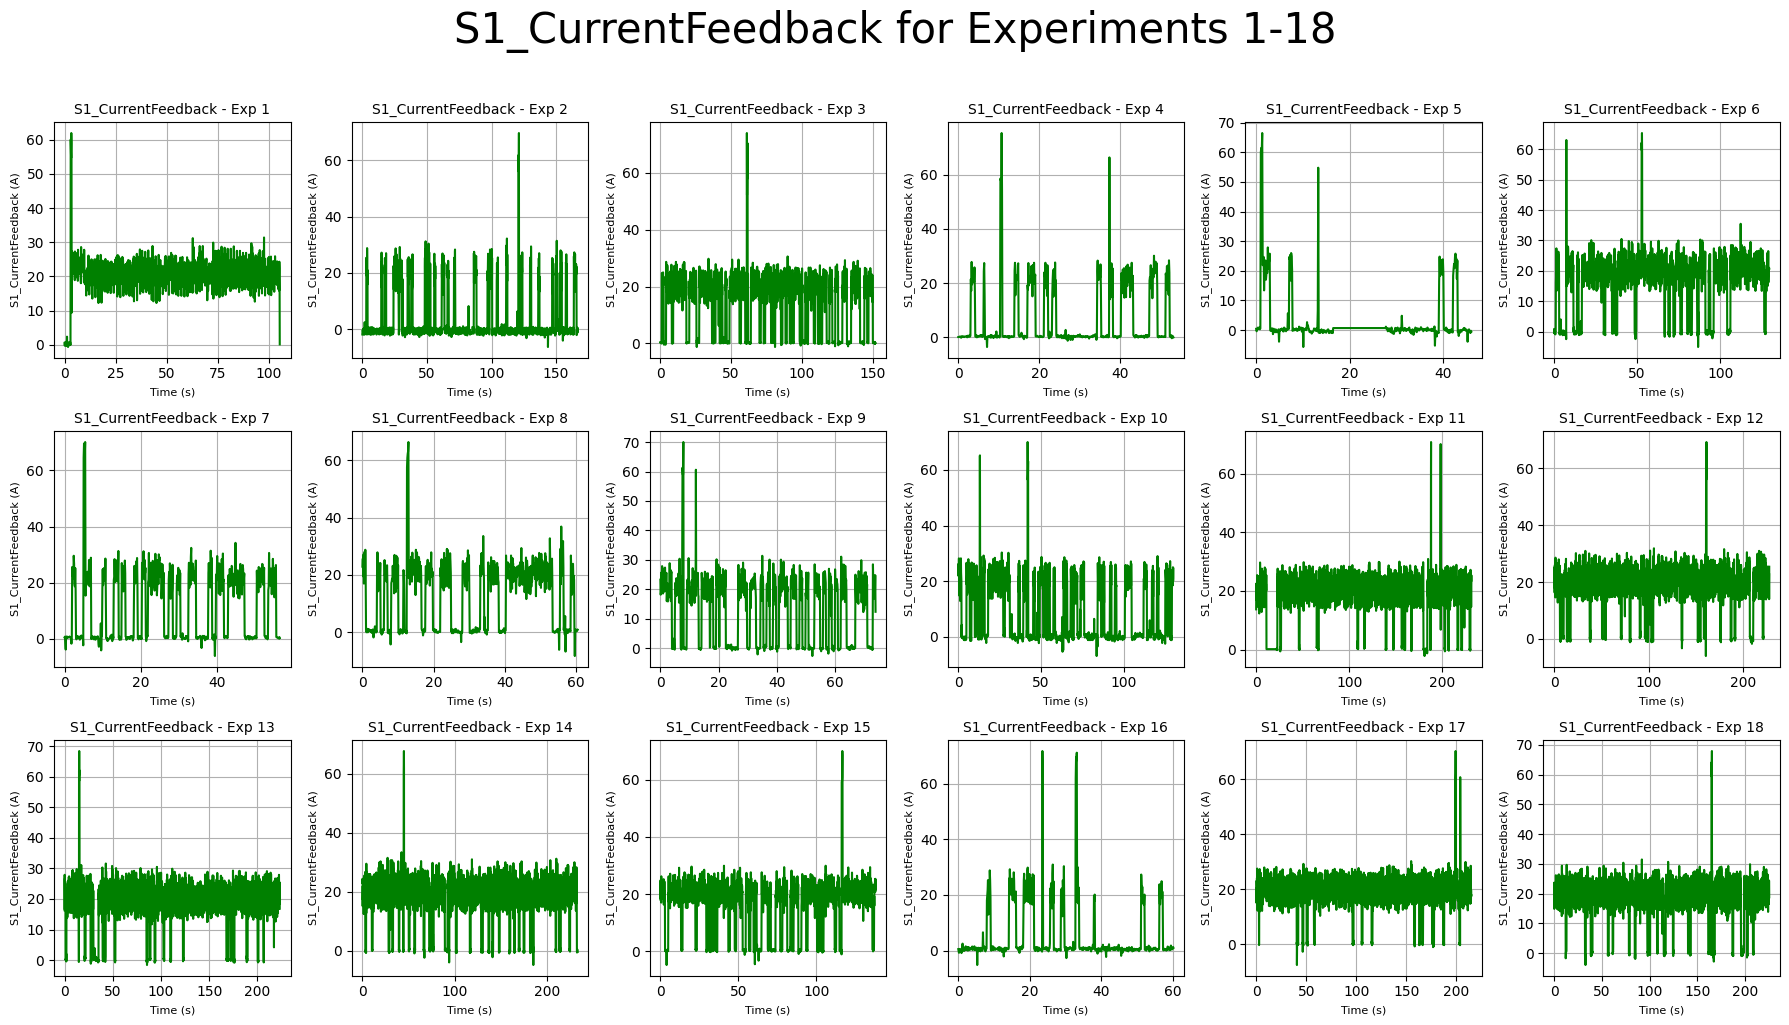

In [ ]:
plot_time_all_experiments(experiments, "X1_CurrentFeedback", "X1_CurrentFeedback (A)", "green", "X1_CurrentFeedback for Experiments 1-18")
plot_time_all_experiments(experiments, "Y1_CurrentFeedback", "Y1_CurrentFeedback (A)", "green","Y1_CurrentFeedback for Experiments 1-18")
plot_time_all_experiments(experiments, "Z1_CurrentFeedback", "Z1_CurrentFeedback (A)", "green", "Z1_CurrentFeedback for Experiments 1-18")
plot_time_all_experiments(experiments, "S1_CurrentFeedback", "S1_CurrentFeedback (A)", "green","S1_CurrentFeedback for Experiments 1-18")


## Plotting Acceleration vs Time

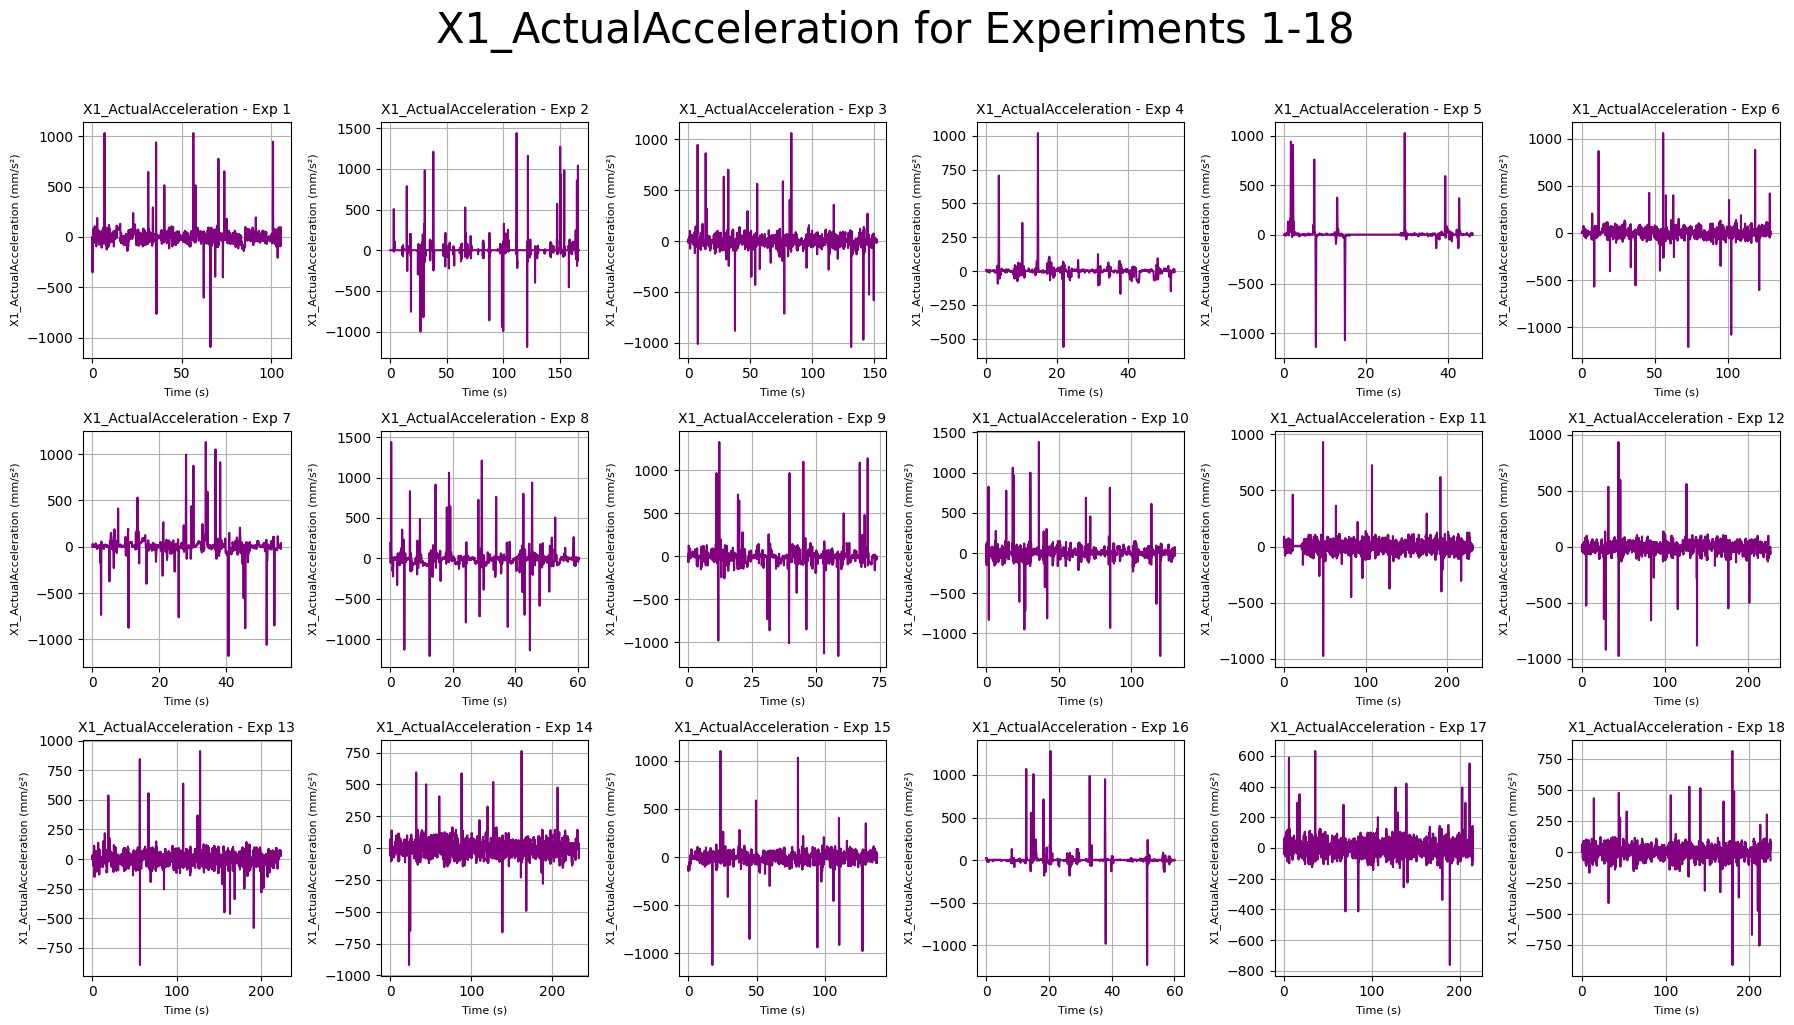

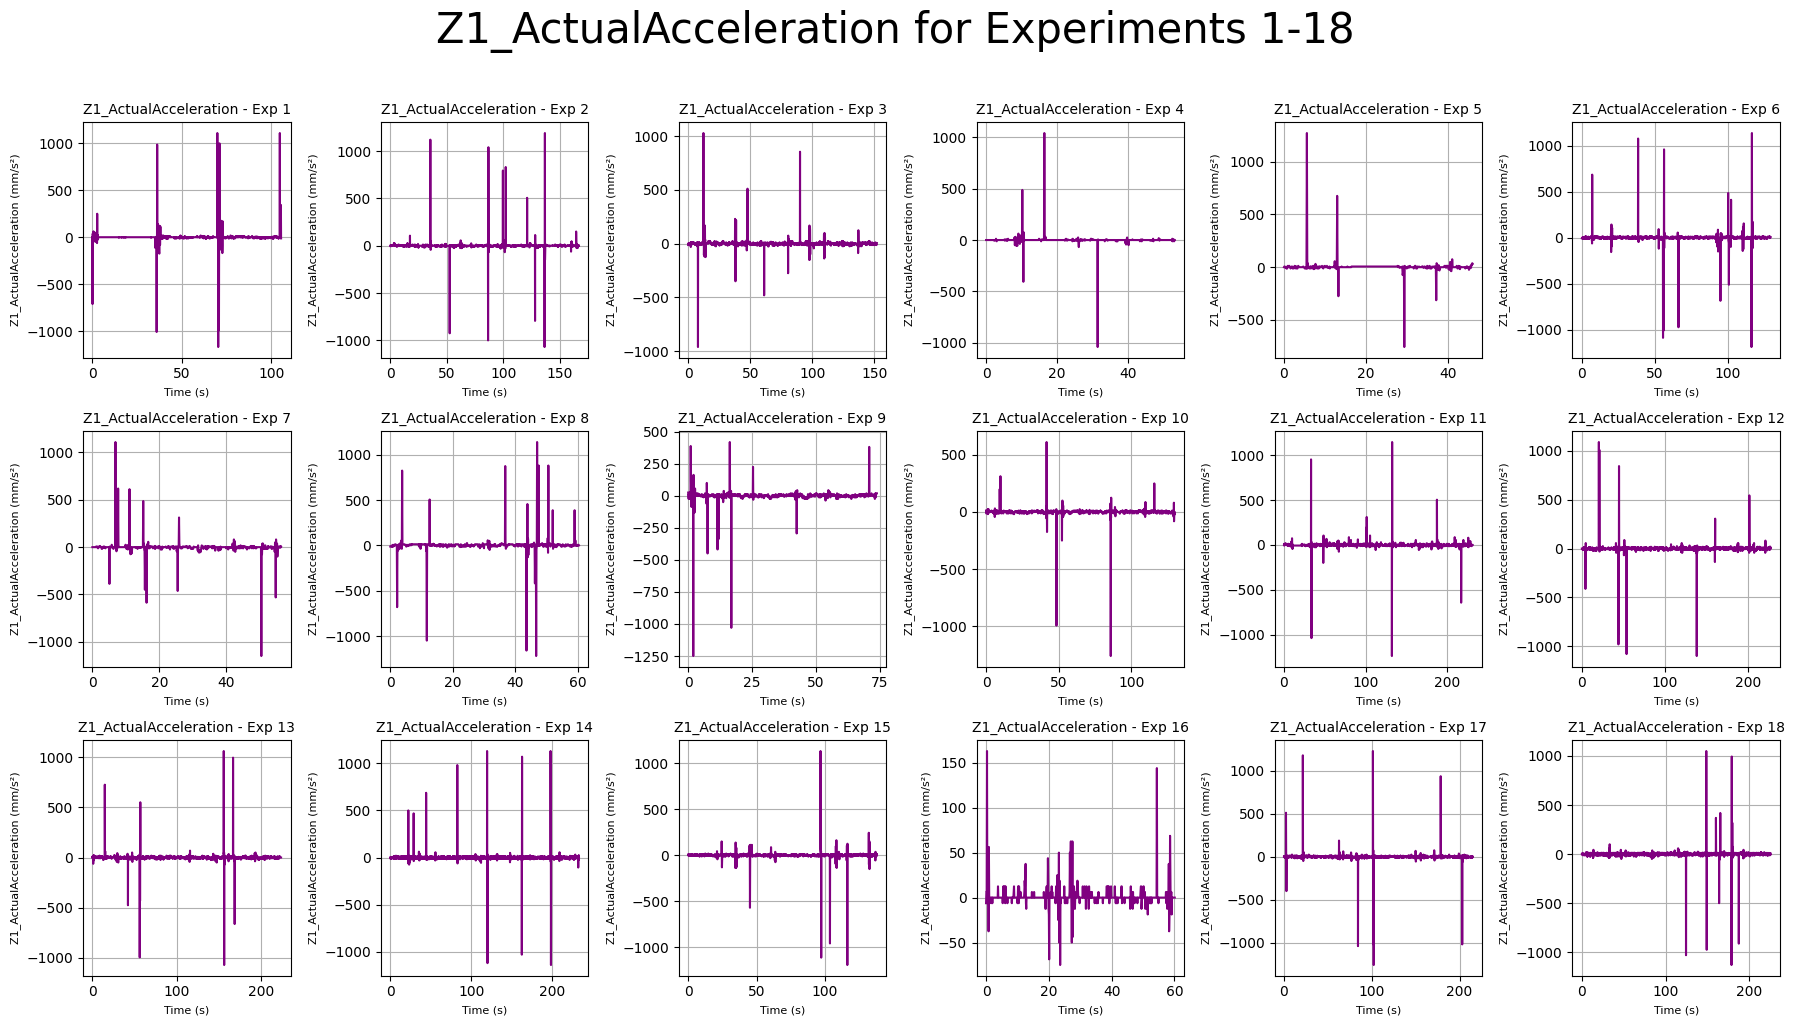

In [ ]:
plot_time_all_experiments(experiments, "X1_ActualAcceleration", "X1_ActualAcceleration (mm/s²)", "purple", "X1_ActualAcceleration for Experiments 1-18")
plot_time_all_experiments(experiments, "Z1_ActualAcceleration", "Z1_ActualAcceleration (mm/s²)", "purple", "Z1_ActualAcceleration for Experiments 1-18")


## Plotting Posiion vs Time

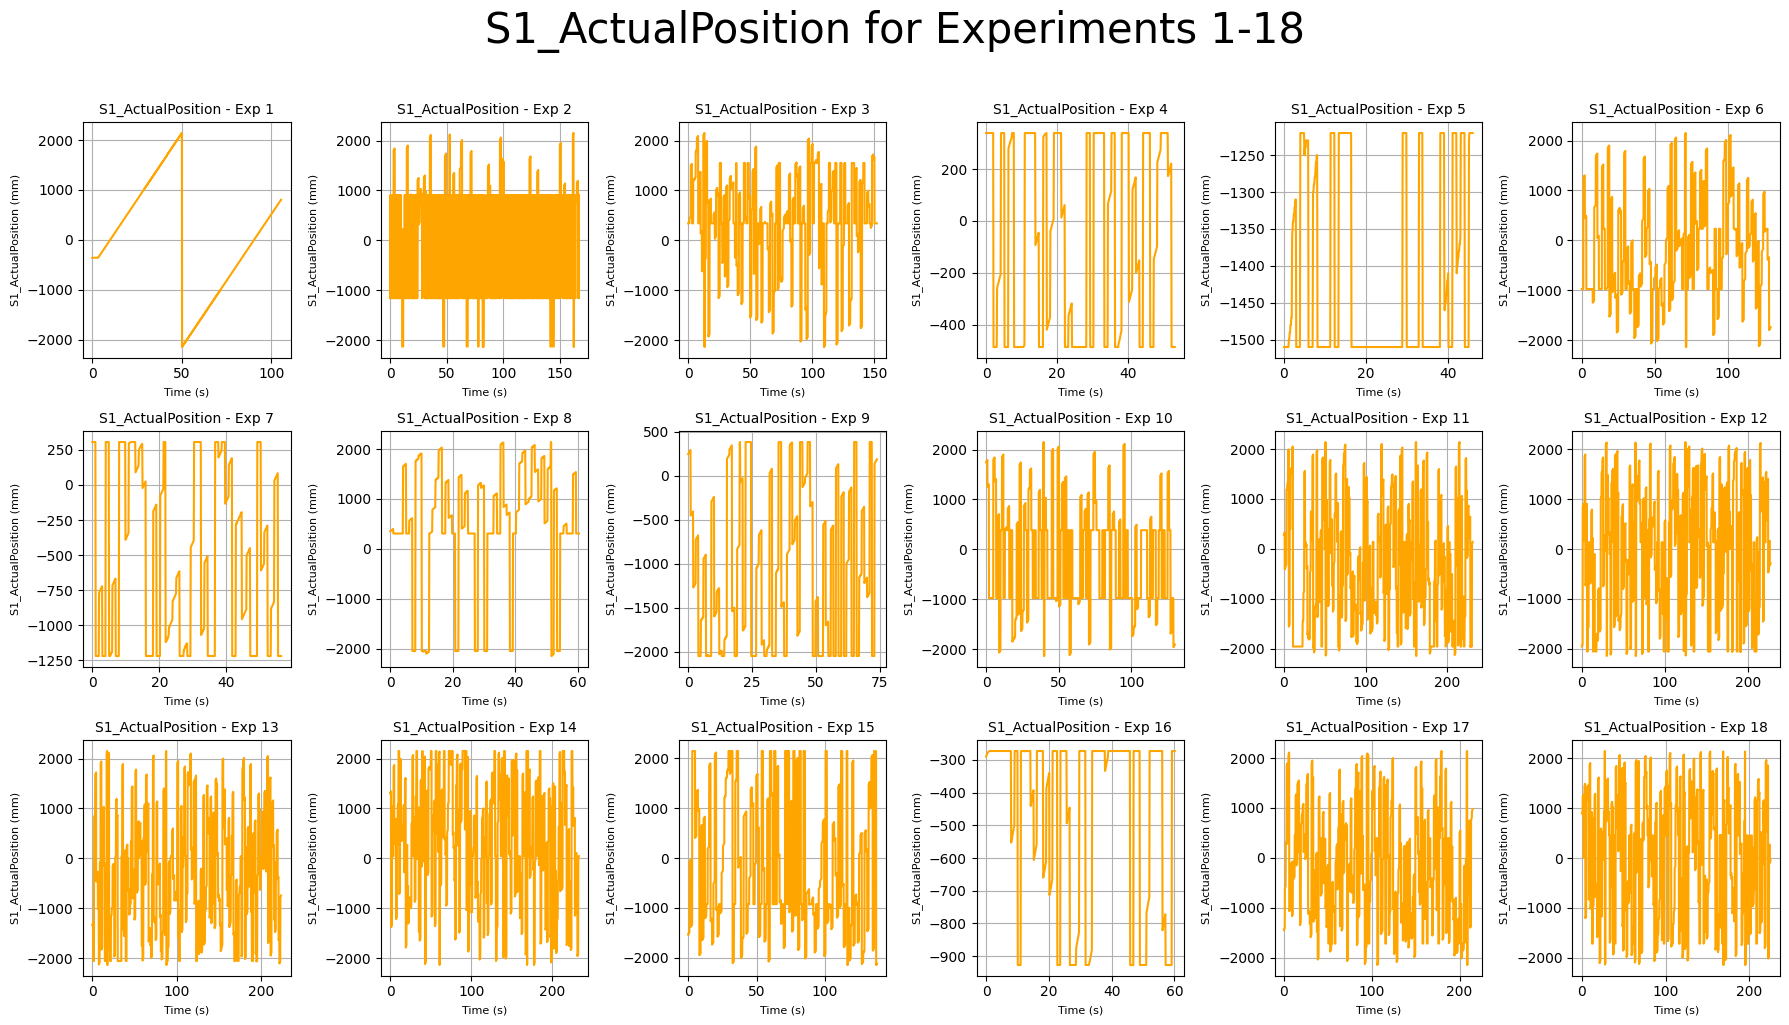

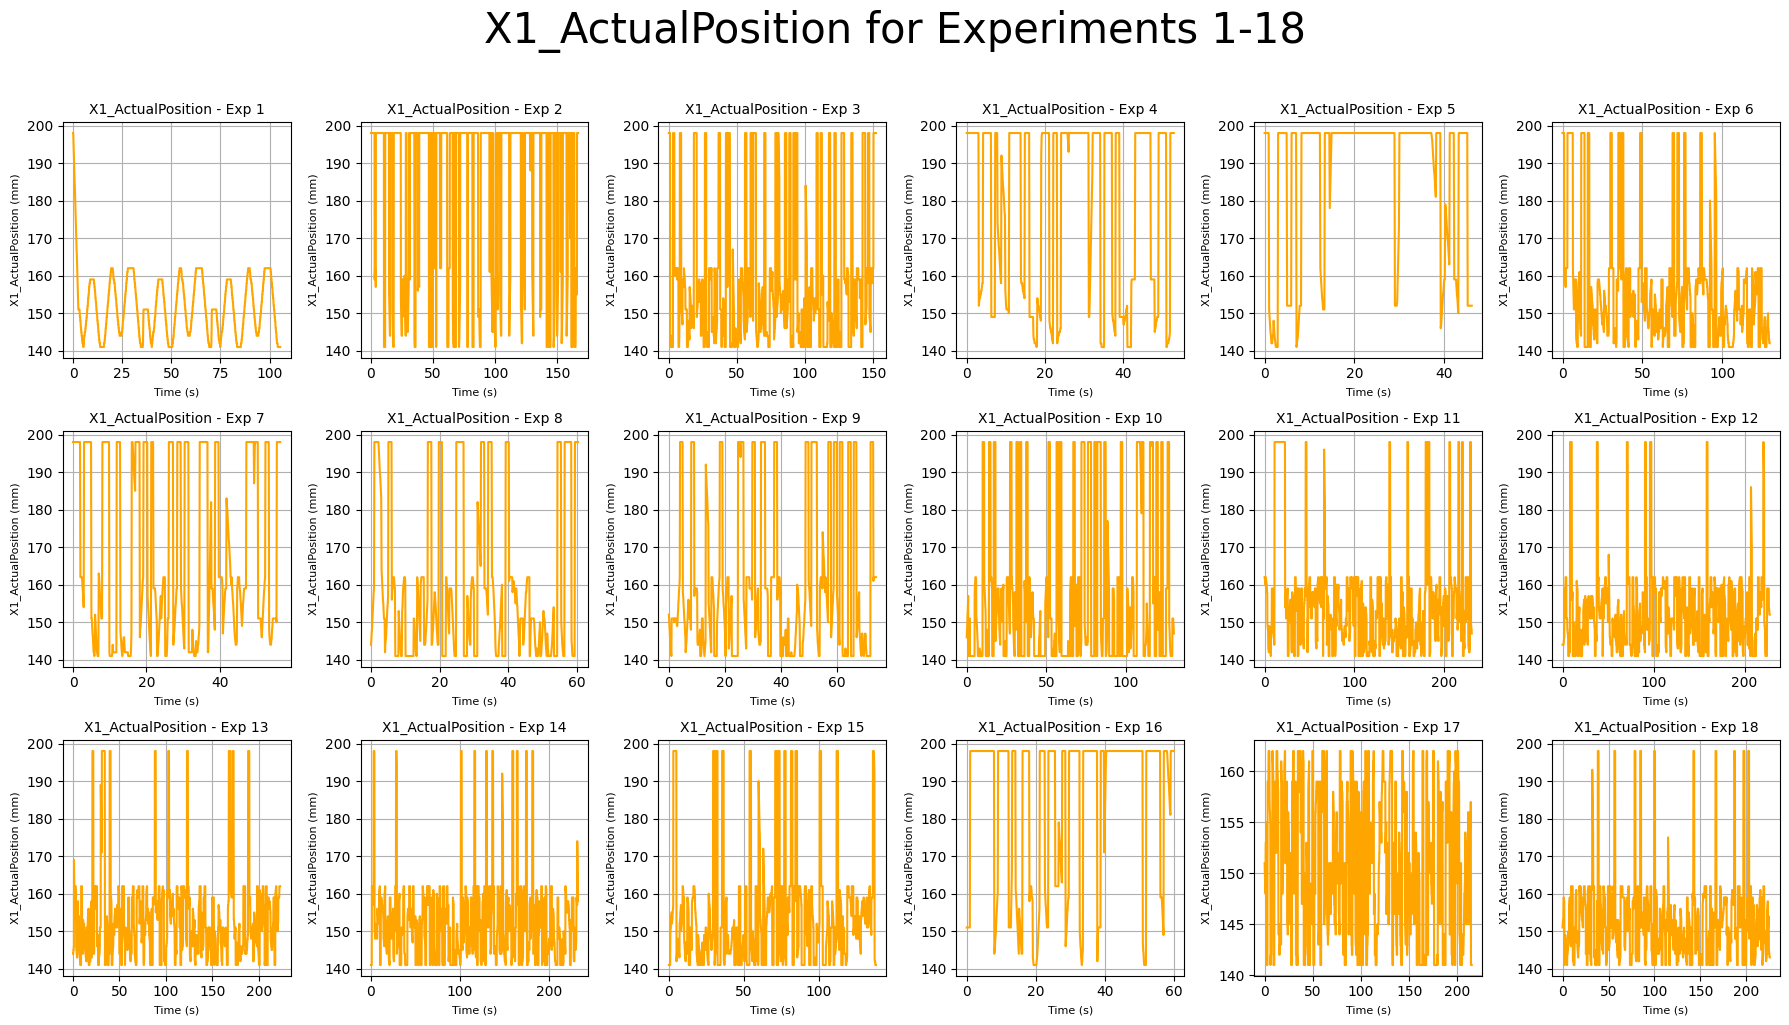

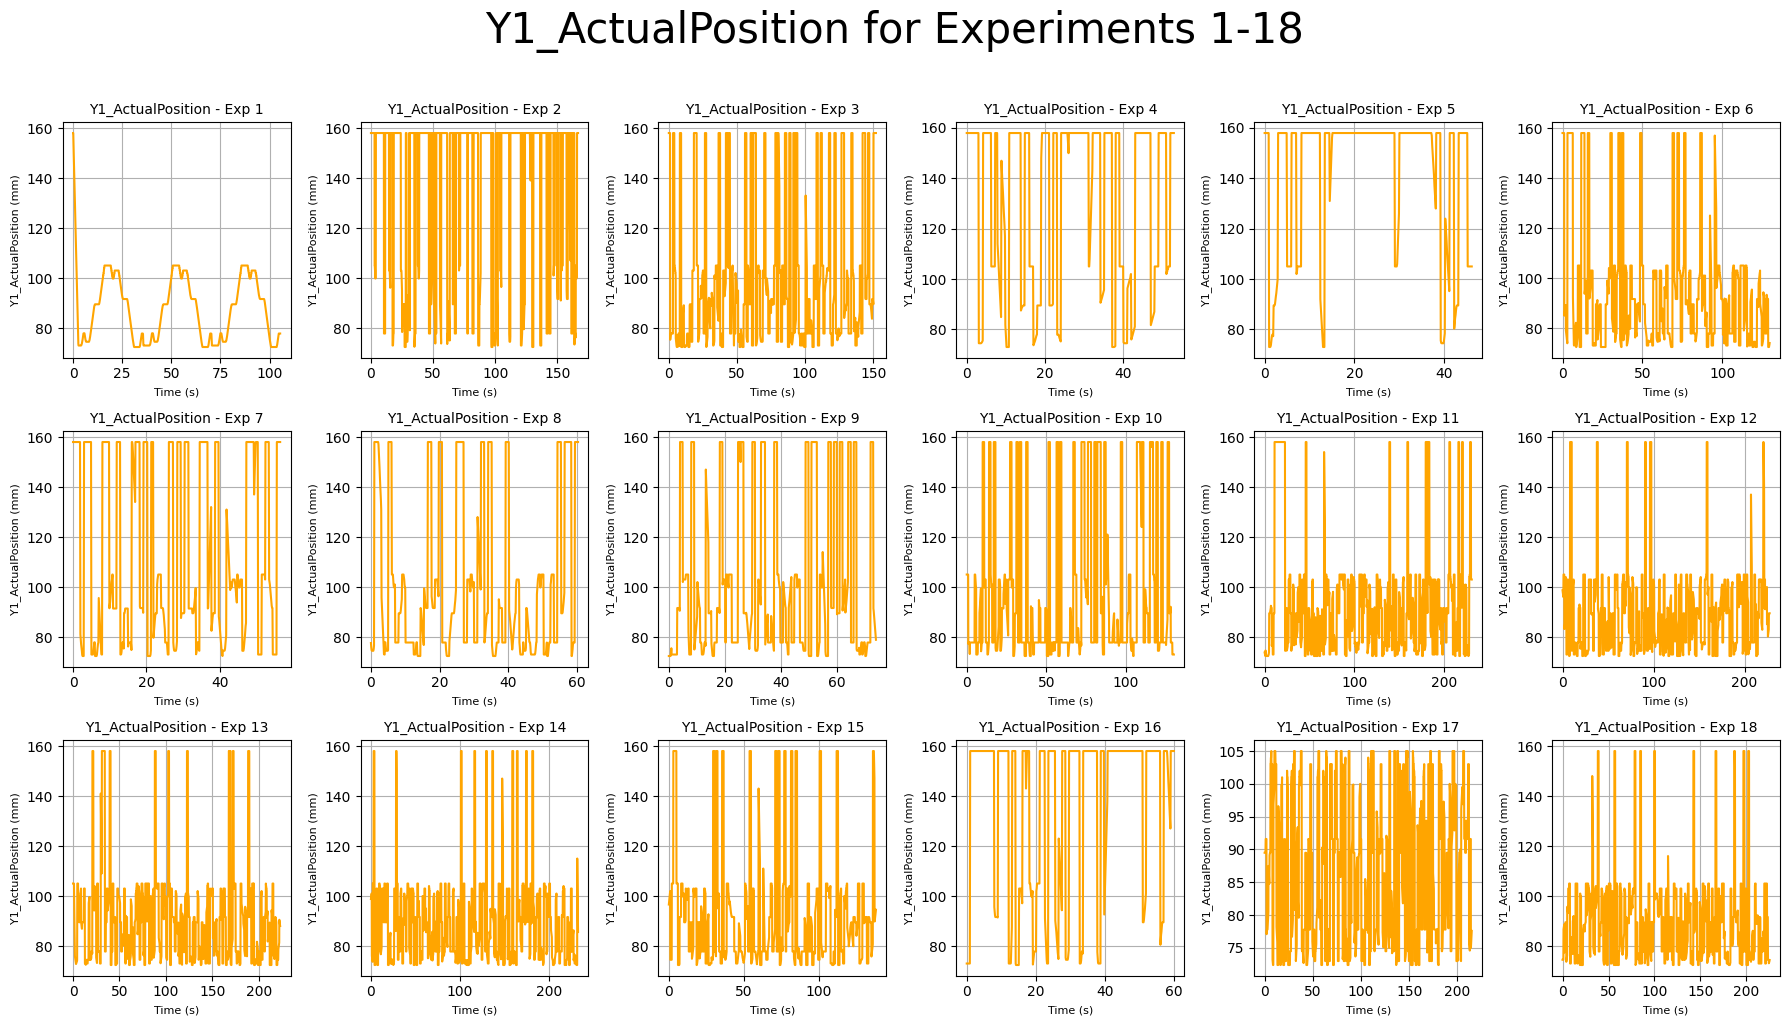

In [ ]:
plot_time_all_experiments(experiments, "S1_ActualPosition", "S1_ActualPosition (mm)", "orange", "S1_ActualPosition for Experiments 1-18")
plot_time_all_experiments(experiments, "X1_ActualPosition", "X1_ActualPosition (mm)", "orange", "X1_ActualPosition for Experiments 1-18")
plot_time_all_experiments(experiments, "Y1_ActualPosition", "Y1_ActualPosition (mm)", "orange", "Y1_ActualPosition for Experiments 1-18")


## Plotting Machining Controller Channel vs Time

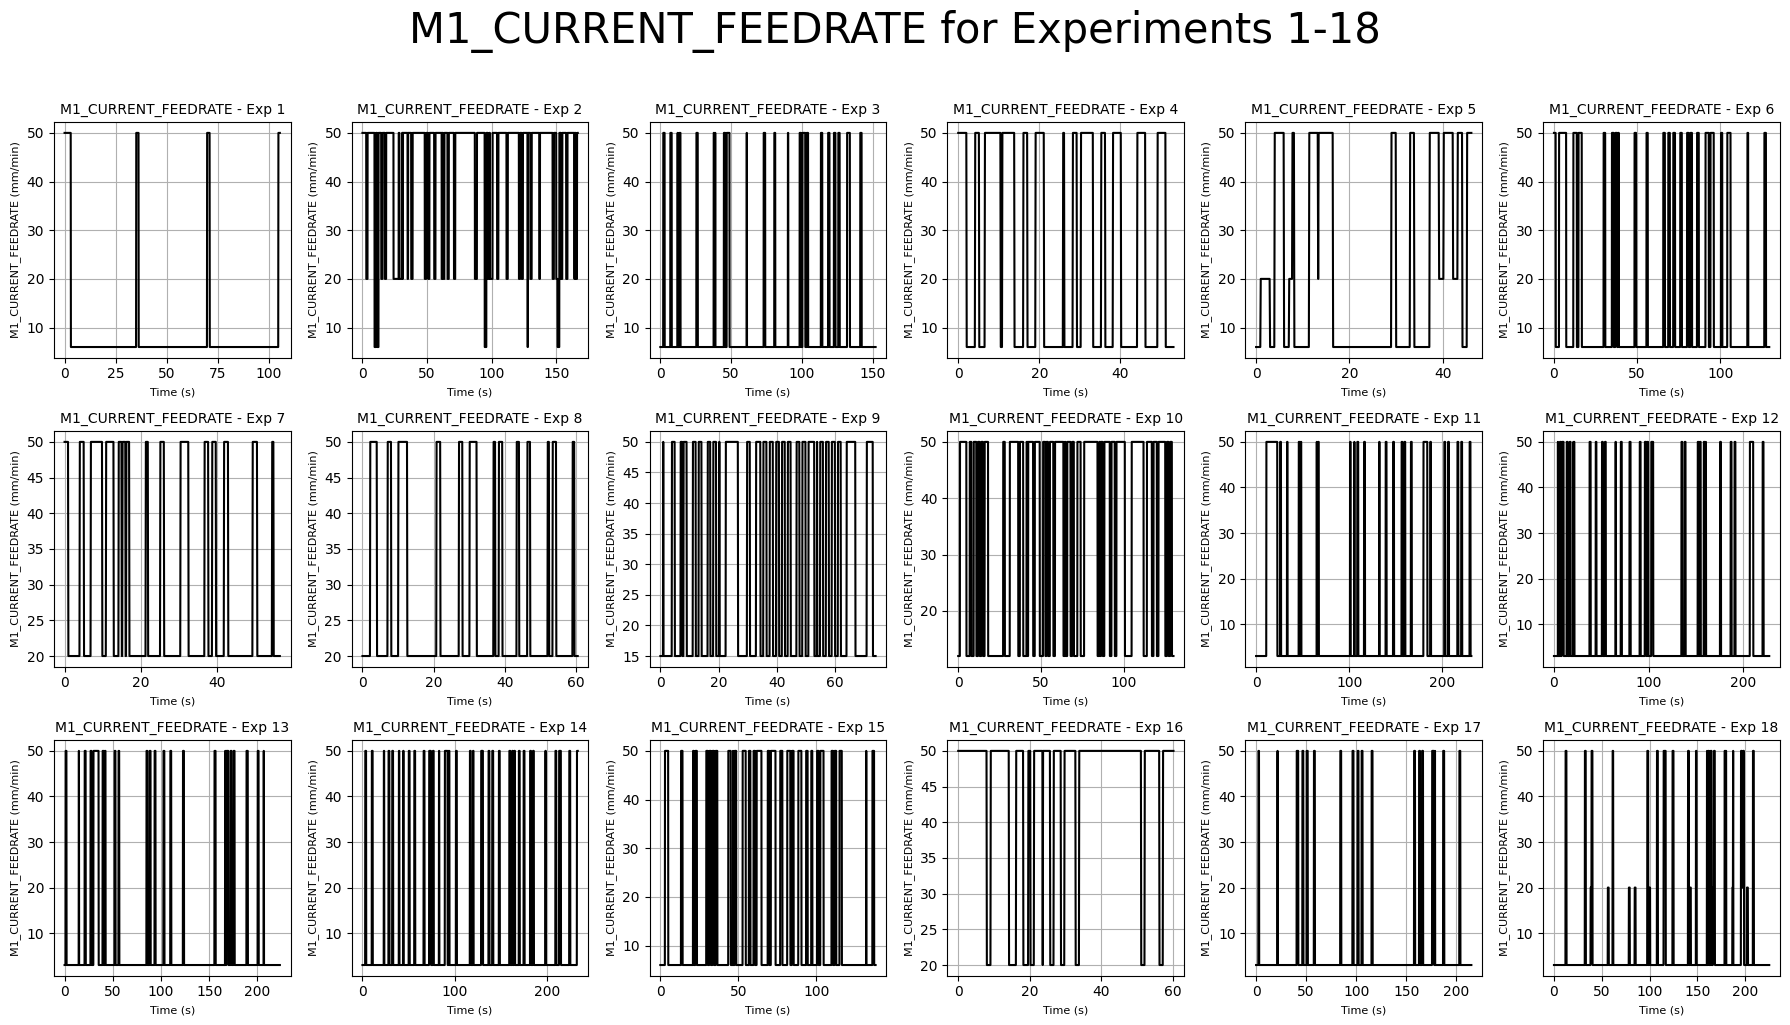

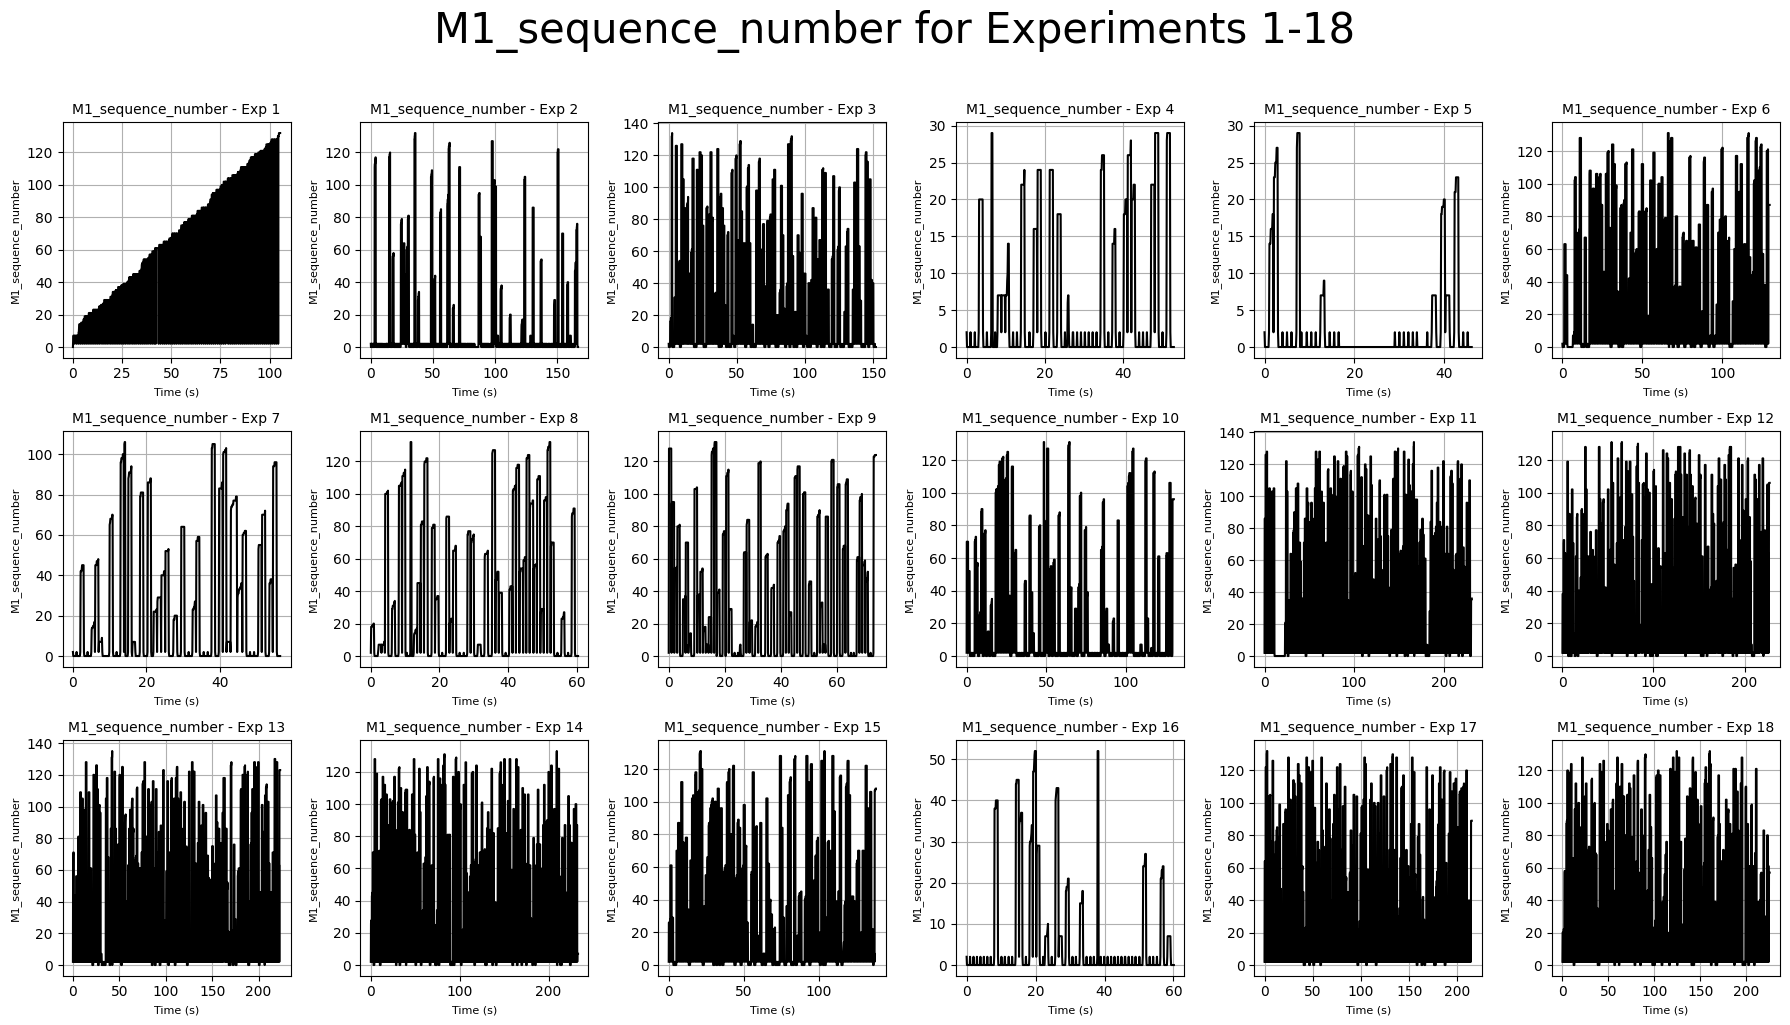

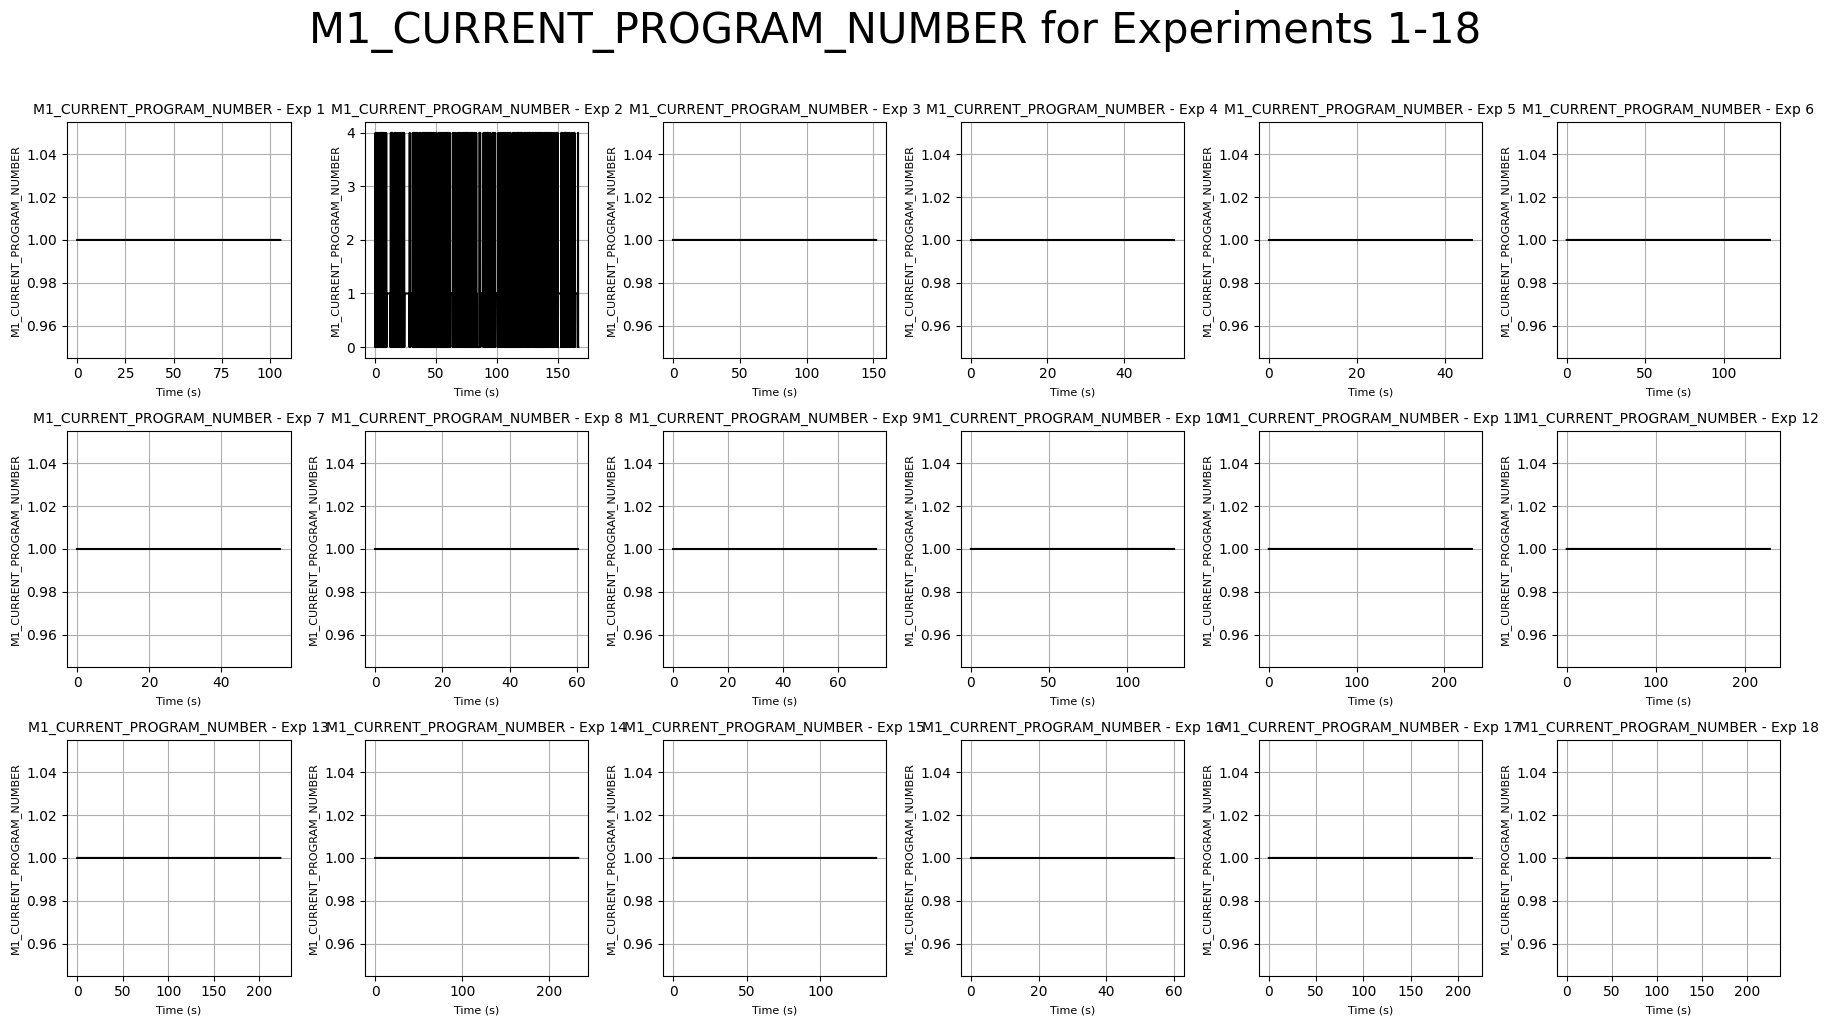

In [ ]:
plot_time_all_experiments(experiments, "M1_CURRENT_FEEDRATE", "M1_CURRENT_FEEDRATE (mm/min)", "black", "M1_CURRENT_FEEDRATE for Experiments 1-18")
plot_time_all_experiments(experiments, "M1_sequence_number", "M1_sequence_number", "black", "M1_sequence_number for Experiments 1-18")
plot_time_all_experiments(experiments, "M1_CURRENT_PROGRAM_NUMBER", "M1_CURRENT_PROGRAM_NUMBER", "black", "M1_CURRENT_PROGRAM_NUMBER for Experiments 1-18")


## Scatter Plot of feedrate vs clamp Pressure

## 

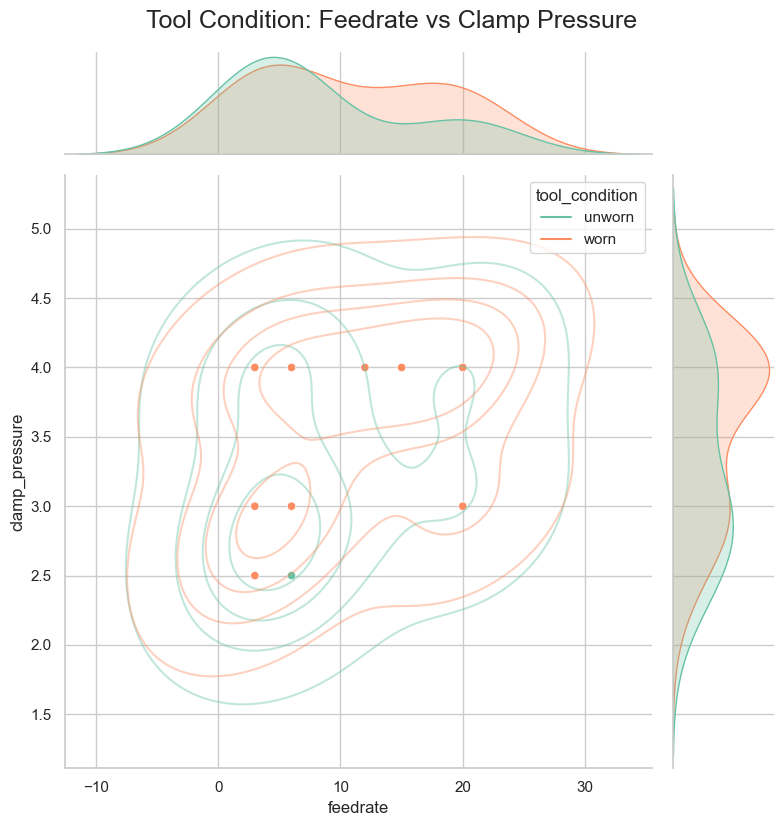

In [ ]:
from src.utils import plot_feedrate_clamp_joint

plot_feedrate_clamp_joint(dftrain, title="Tool Condition: Feedrate vs Clamp Pressure")


## Plotting Average of Important Features for experimetns 1-18

Comparing the averages helps you see how the machine behaves differently when the tool is worn versus unworn.  It quickly shows which signals change the most, like power or current, so you know which features matter.

In [48]:
from src.utils import compare_worn_unworn_multi_feature

vel_features = [
    "X1_ActualVelocity",
    "Y1_ActualVelocity",
    "Z1_ActualVelocity",
    "S1_ActualVelocity"
]

compare_worn_unworn_multi_feature(
    "data/data_id",
    vel_features,
    title="Velocity Features — Worn vs Unworn"
)

current_features = [
    "X1_CurrentFeedback",
    "Y1_CurrentFeedback",
    "Z1_CurrentFeedback",
    "S1_CurrentFeedback"
]

compare_worn_unworn_multi_feature(
    "data/data_id",
    current_features,
    title="Motor Current Feedback — Worn vs Unworn"
)

power_features = [
    "X1_OutputPower",
    "Y1_OutputPower",
    "S1_OutputPower"
]

compare_worn_unworn_multi_feature(
    "data/data_id",
    power_features,
    title="Motor Power — Worn vs Unworn"
)

acceleration_features = [
    "X1_ActualAcceleration",
    "Z1_ActualAcceleration"
]

compare_worn_unworn_multi_feature(
    "data/data_id",
    acceleration_features,
    title="Acceleration — Worn vs Unworn"
)

position_features = [
    "S1_ActualPosition",
    "X1_ActualPosition",
    "Y1_ActualPosition"
]

compare_worn_unworn_multi_feature(
    "data/data_id",
    position_features,
    title="Position — Worn vs Unworn"
)

machining_controller_features = [
    "M1_CURRENT_FEEDRATE",
    "M1_sequence_number",
    "M1_CURRENT_PROGRAM_NUMBER"
]

compare_worn_unworn_multi_feature(
    "data/data_id",
    machining_controller_features,
    title="Machining Controller Signals — Worn vs Unworn"
)



ModuleNotFoundError: No module named 'seaborn'

# Individual Model Training
Individual models will be trained using the previously pre-processed data. Models will be tested and comapred according to the forumlated windowed test data with window size of 10. 

For this time-series machine learning study done on CNC Toolwear data, we decided to train and compare the following models:

- LSTM (Long Short Term Memory)
- GRU (Gated Recurrent Unit)
- TCN (Temporal Convolution Network)
- Transformer



### **LSTM Model**

*The below cells outline the training and testing of our LSTM model for the CNC Toolwear Dataset.*

*The model was first trained using baseline parameters to get rudimentary performance. Hyper parameter optimization was then completed and the model was retrained and compared to the baseline to assess the effectivness of HPO.*

**LSTM Model Design**

*The following architecture and parameters were used for our baseline LSTM Model*

In [ ]:
# Insert outline of model architecture and any nescasary figures and hyperparameters. 

**Timing and Training of the Baseline LSTM Model**

In [ ]:
# Insert call to the training method of the LSTM model here.
# Make sure to start and end time before and after the method call.

# Report time taken for training.

**Comparison of Training and Validation Loss**

*The below plot helps us determine if the model is overfitting during training.*

In [ ]:
# Insert code to get train vs. validaton loss per epoch plot

After observing the plot above it is clear that our model is.....

**Model Metrics**

*The accuracy, f1-score, recall, precision, and confusion matrix for our baseline model can be seen below.*

In [ ]:
# Insert call to get the metrics for the LSTM model on the test set.

**Hyperparameter Optimization for the LSTM Model**

*The following parameters were tuned using hyperparameter optimization:*
- Learning Rate (0.0001, 0.002)
- etc.


In [ ]:
# Insert call to get Hyperprameter Optimization results.

# Output best values found during tuning.

**Retraining LSTM  Model Using Optimized Hyperparameters**

*The model is now retrained using the optimal values found during HPO*

In [ ]:
# Insert code to retrain model using best hyperparameters on full training set as well as total train time.

**Comparison of Training Time between Baseline and Optimized Models**

*After HPO we can see the training time of models was changed accordingly*

In [ ]:
# Insert code to compare both training times with a bar plot.

**Comparison of Training and Validation Loss for the Optimzied Model**

*The below plot shows the comparison between Training and Validation Loss during training*

In [ ]:
# Insert call to get the plot of Training vs, Validation Loss for the final model during training.

# Also display the previous baseline plot to show comparison before and after HPO.

**Optimized Model Metrics**

*After completing HPO, the accuracy, precison, f1-score, recall, and confusion matrix of the optimized model can be seen below.*

In [ ]:
# Insert call to get the metrics for the Optimized LSTM model on the test set.

**Final Comparison of Baseline vs. Optimized LSTM Models**

*The below plots show the effectiveness of our HPO performed on the LSTM Model for the CNC Toolwear Dataset.*

In [ ]:
# Insert call to create plots comparing the metrics of the two models.

**Overall Summary of LSTM Model Training**

After completing the training of our LSTM Model.....

### **GRU Model**

*The below cells outline the training and testing of our GRU model for the CNC Toolwear Dataset.*

*The model was first trained using baseline parameters to get rudimentary performance. Hyper parameter optimization was then completed and the model was retrained and compared to the baseline to assess the effectivness of HPO.*

**GRU Model Design**

talk about gru model

In [ ]:
from tensorflow.keras.models import load_model
import os, json, pickle

# Load model
model = load_model("saved_baseline/baseline_model.h5")

# Load metadata
with open("saved_baseline/meta.json", "r") as f:
    meta = json.load(f)

train_time = meta["train_time"]

# Load history
with open("saved_baseline/history.pkl", "rb") as f:
    history = pickle.load(f)

# Print summary + training time
model.summary()
train_time


Epoch 1/40
433/433 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.9393 - loss: 0.0341 - val_accuracy: 0.9942 - val_loss: 0.0040
Epoch 2/40
433/433 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9821 - loss: 0.0110 - val_accuracy: 0.9920 - val_loss: 0.0052
Epoch 3/40
433/433 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9876 - loss: 0.0079 - val_accuracy: 0.9964 - val_loss: 0.0024
Epoch 4/40
433/433 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9895 - loss: 0.0056 - val_accuracy: 0.9962 - val_loss: 0.0023
Epoch 5/40
433/433 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9907 - loss: 0.0064 - val_accuracy: 0.9946 - val_loss: 0.0034
Epoch 6/40
433/433 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9876 - loss: 0.0064 - val_accuracy: 0.9948 - val_loss: 0.0026
Epoch 7/40
433/433 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9920 - loss: 0.0040 - val_accuracy: 0.9942 - val_loss: 0.0024
Epoch 8/40
433/433 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9914 - loss: 0.0041 - val_accuracy: 0.

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru (GRU)                       │ (None, 10, 64)         │        17,472 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 10, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_1 (GRU)                     │ (None, 32)             │         9,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 83,909 (327.77 KB)

 Trainable params: 27,969 (109.25 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 55,940 (218.52 KB)

**Timing and Training of the Baseline GRU Model**

In [ ]:
# Insert call to the training method of the GRU model here.
# Make sure to start and end time before and after the method call.

import gru_run
baseline = gru_run.load_baseline(os.path.join(PROJECT_ROOT, "saved_baseline"))

# --- Report time taken for training ---
train_time = baseline["train_time"]
print(f"\nBaseline GRU Training Time: {train_time:.2f} seconds")
# Report time taken for training.

**Comparison of Training and Validation Loss**

*The below plot helps us determine if the model is overfitting during training.*

In [ ]:
# Insert code to get train vs. validaton loss per epoch plot

After observing the plot above it is clear that our model is.....

**Model Metrics**

*The accuracy, f1-score, recall, precision, and confusion matrix for our baseline model can be seen below.*

In [ ]:
# Insert call to get the metrics for the GRU model on the test set.

**Hyperparameter Optimization for the GRU Model**

*The following parameters were tuned using hyperparameter optimization:*
- Learning Rate (0.0001, 0.002)
- etc.


In [ ]:
# Insert call to get Hyperprameter Optimization results.

# Output best values found during tuning.

**Retraining GRU  Model Using Optimized Hyperparameters**

*The model is now retrained using the optimal values found during HPO*

In [ ]:
# Insert code to retrain model using best hyperparameters on full training set as well as total train time.

**Comparison of Training Time between Baseline and Optimized Models**

*After HPO we can see the training time of models was changed accordingly*

In [ ]:
# Insert code to compare both training times with a bar plot.

**Comparison of Training and Validation Loss for the Optimzied Model**

*The below plot shows the comparison between Training and Validation Loss during training*

In [ ]:
# Insert call to get the plot of Training vs, Validation Loss for the final model during training.

# Also display the previous baseline plot to show comparison before and after HPO.

**Optimized Model Metrics**

*After completing HPO, the accuracy, precison, f1-score, recall, and confusion matrix of the optimized model can be seen below.*

In [ ]:
# Insert call to get the metrics for the Optimized GRU model on the test set.

**Final Comparison of Baseline vs. Optimized GRU Models**

*The below plots show the effectiveness of our HPO performed on the GRU Model for the CNC Toolwear Dataset.*

In [ ]:
# Insert call to create plots comparing the metrics of the two models.

**Overall Summary of GRU Model Training**

After completing the training of our LSTM Model.....

### **TCN Model**

*The below cells outline the training and testing of our TCN model for the CNC Toolwear Dataset.*

*The model was first trained using baseline parameters to get rudimentary performance. Hyper parameter optimization was then completed and the model was retrained and compared to the baseline to assess the effectivness of HPO.*

**TCN Model Design**

*The following architecture and parameters were used for our baseline TCN Model*

In [ ]:
# Insert outline of model architecture and any nescasary figures and hyperparameters. 

**Timing and Training of the Baseline TCN Model**

In [ ]:
# Insert call to the training method of the TCN model here.
# Make sure to start and end time before and after the method call.

# Report time taken for training.

**Comparison of Training and Validation Loss**

*The below plot helps us determine if the model is overfitting during training.*

In [ ]:
# Insert code to get train vs. validaton loss per epoch plot

After observing the plot above it is clear that our model is.....

**Model Metrics**

*The accuracy, f1-score, recall, precision, and confusion matrix for our baseline model can be seen below.*

In [ ]:
# Insert call to get the metrics for the TCN model on the test set.

**Hyperparameter Optimization for the TCN Model**

*The following parameters were tuned using hyperparameter optimization:*
- Learning Rate (0.0001, 0.002)
- etc.


In [ ]:
# Insert call to get Hyperprameter Optimization results.

# Output best values found during tuning.

**Retraining TCN  Model Using Optimized Hyperparameters**

*The model is now retrained using the optimal values found during HPO*

In [ ]:
# Insert code to retrain model using best hyperparameters on full training set as well as total train time.

**Comparison of Training Time between Baseline and Optimized Models**

*After HPO we can see the training time of models was changed accordingly*

In [ ]:
# Insert code to compare both training times with a bar plot.

**Comparison of Training and Validation Loss for the Optimzied Model**

*The below plot shows the comparison between Training and Validation Loss during training*

In [ ]:
# Insert call to get the plot of Training vs, Validation Loss for the final model during training.

# Also display the previous baseline plot to show comparison before and after HPO.

**Optimized Model Metrics**

*After completing HPO, the accuracy, precison, f1-score, recall, and confusion matrix of the optimized model can be seen below.*

In [ ]:
# Insert call to get the metrics for the Optimized TCN model on the test set.

**Final Comparison of Baseline vs. Optimized TCN Models**

*The below plots show the effectiveness of our HPO performed on the TCN Model for the CNC Toolwear Dataset.*

In [ ]:
# Insert call to create plots comparing the metrics of the two models.

**Overall Summary of TCN Model Training**

After completing the training of our TCN Model.....

### **Transformer Model**

*The below cells outline the training and testing of our Transformer model for the CNC Toolwear Dataset.*

*The model was first trained using baseline parameters to get rudimentary performance. Hyper parameter optimization was then completed and the model was retrained and compared to the baseline to assess the effectivness of HPO.*

**Transformer Model Design**

*The following architecture and parameters were used for our baseline Transformer Model*

In [2]:
from scripts.transformer import load_transformer_data, build_transformer, BASELINE_PARAMS

X_train, y_train, X_val, y_val, X_test, y_test, meta = load_transformer_data(
    window_size=10,
    target_col="successful_part",
)

time_steps   = meta["time_steps"]
num_features = meta["num_features"]

baseline_model = build_transformer(time_steps, num_features, BASELINE_PARAMS) # Function call to transformer.py to build model

# Provides baseline model summary and hyperparameters
print("Baseline params:", BASELINE_PARAMS)
baseline_model.summary()

time_steps: 10 num_features: 25 num_classes: 2

Baseline params: {'num_heads': 2, 'ff_dim': 32, 'num_blocks': 1, 'dense_units': 32, 'dropout_rate': 0.3, 'lr': 0.0005}


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 10, 25)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ transformer_encoder_block       │ (None, 10, 25)         │         1,988 │
│ (TransformerEncoderBlock)       │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 250)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │         8,032 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,053 (39.27 KB)

 Trainable params: 10,053 (39.27 KB)

 Non-trainable params: 0 (0.00 B)

**Timing and Training of the Baseline Transformer Model**

In [3]:
from scripts.transformer import train_transformer

# Function call to transformer.py to train the transformer usng baseline parameters.
baseline_model, baseline_history, baseline_train_time = train_transformer(
    X_train, y_train,
    X_val, y_val,
    time_steps=time_steps,
    num_features=num_features,
    params=None,        
    epochs=60,
    batch_size=64,
)

print(f"Training time: {baseline_train_time:.2f} seconds")

Epoch 1/60
217/217 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.8194 - loss: 0.3891 - val_accuracy: 0.9962 - val_loss: 0.0320
Epoch 2/60
217/217 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.9604 - loss: 0.1010 - val_accuracy: 0.9940 - val_loss: 0.0223
Epoch 3/60
217/217 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.9729 - loss: 0.0707 - val_accuracy: 0.9970 - val_loss: 0.0106
Epoch 4/60
217/217 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.9813 - loss: 0.0494 - val_accuracy: 0.9988 - val_loss: 0.0054
Epoch 5/60
217/217 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.9869 - loss: 0.0335 - val_accuracy: 0.9988 - val_loss: 0.0055
Epoch 6/60
217/217 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.9897 - loss: 0.0276 - val_accuracy: 0.9984 - val_loss: 0.0050
Epoch 7/60
217/217 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9912 - loss: 0.0236 - val_accuracy: 0.9976 - val_loss: 0.0062
Epoch 8/60
217/217 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9917 - loss: 0.0206 - val_accuracy

**Comparison of Training and Validation Loss**

*The below plot helps us determine if the model is overfitting during training.*

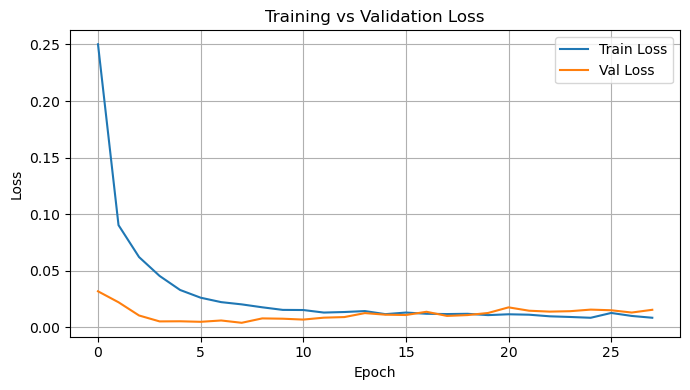

In [4]:
import matplotlib.pyplot as plt

# Plotting the training/validation loss vs. epoch during training.
plt.figure(figsize=(7,4))
plt.plot(baseline_history.history["loss"], label="Train Loss")
plt.plot(baseline_history.history["val_loss"], label="Val Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training vs Validation Loss")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


After observing the plot above it is clear that our model is.....

**Model Metrics**

*The accuracy, f1-score, recall, precision, and confusion matrix for our baseline model can be seen below.*

196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Accuracy:  0.9169
Precision: 0.8943
Recall:    0.9993
F1-score:  0.9439
ROC AUC:   0.9916

Confusion Matrix:
 [[1367  518]
 [   3 4382]]


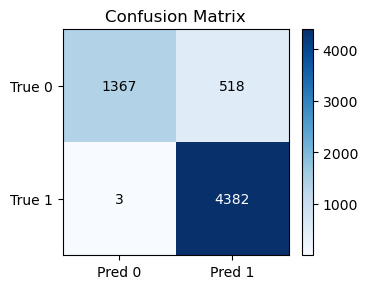

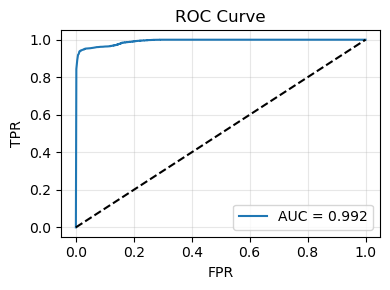

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    roc_curve,
    auc,
)

# Computing the model's predictions on the test set.
y_prob = baseline_model.predict(X_test).ravel()
y_pred = (y_prob >= 0.5).astype(int)

# Calculating the metrics for the model on the test set.
acc     = accuracy_score(y_test, y_pred)
prec    = precision_score(y_test, y_pred)
rec     = recall_score(y_test, y_pred)
f1      = f1_score(y_test, y_pred)
cm      = confusion_matrix(y_test, y_pred)

fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Output metrics
print("Accuracy: ",  round(acc, 4))
print("Precision:", round(prec, 4))
print("Recall:   ", round(rec, 4))
print("F1-score: ", round(f1, 4))
print("ROC AUC:  ", round(roc_auc, 4))
print("\nConfusion Matrix:\n", cm)

# Confusion Matrix Plot
plt.figure(figsize=(4,3))
plt.imshow(cm, cmap="Blues")
plt.title("Confusion Matrix")
plt.colorbar(fraction=0.046, pad=0.04)
plt.xticks([0,1], ["Pred 0", "Pred 1"])
plt.yticks([0,1], ["True 0", "True 1"])
thresh = cm.max() / 2
for i in range(2):
    for j in range(2):
        plt.text(j, i, cm[i,j], ha='center', va='center',
                 color="white" if cm[i,j] > thresh else "black")
plt.tight_layout()
plt.show()

# ROC Curve Plot
plt.figure(figsize=(4,3))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.3f}")
plt.plot([0,1], [0,1], "k--")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC Curve")
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


**Hyperparameter Optimization for the Transformer Model**

*The following parameters were tuned using hyperparameter optimization:*
- Learning Rate (0.0001, 0.002)
- etc.


In [6]:
from scripts.transformer import tune_transformer, hp_to_params

# Running the hyperparameter optimization from transformer.py
best_hp, tuner = tune_transformer(
    X_train, y_train,
    X_val, y_val,
    time_steps=time_steps,
    num_features=num_features,
    batch_size=64,
    epochs_tune=10,
    max_trials=50,
)

# Convert best_hp → simple Python dict using hp_to_params in transformer.py
tuned_params = hp_to_params(best_hp)

# Output best values found during tuning.
print("\nBest Hyperparameters Found:")
for k, v in tuned_params.items():
    print(f"  {k}: {v}")


Trial 50 Complete [00h 00m 34s]
val_accuracy: 0.997809648513794

Best val_accuracy So Far: 0.9996017813682556
Total elapsed time: 00h 34m 24s

Best hyperparameters:
  num_heads: 2
  ff_dim: 48
  num_blocks: 1
  dense_units: 64
  dropout_rate: 0.3
  lr: 0.0005

Best Hyperparameters Found:
  num_heads: 2
  ff_dim: 48
  num_blocks: 1
  dense_units: 64
  dropout_rate: 0.3
  lr: 0.0005


**Retraining Transformer  Model Using Optimized Hyperparameters**

*The model is now retrained using the optimal values found during HPO*

In [8]:
from scripts.transformer import train_transformer

# Function call to transformer.py to train the transformer using optimized hyperparameters.
opt_model, opt_history, opt_time = train_transformer(
    X_train, y_train,
    X_val, y_val,
    time_steps=time_steps,
    num_features=num_features,
    params=tuned_params,   # best parameters from HPO
    epochs=60,
)

print(f"Training time: {opt_time:.2f} seconds")

Epoch 1/60
217/217 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.8179 - loss: 0.4004 - val_accuracy: 0.9898 - val_loss: 0.0430
Epoch 2/60
217/217 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.9679 - loss: 0.0897 - val_accuracy: 0.9972 - val_loss: 0.0184
Epoch 3/60
217/217 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.9794 - loss: 0.0574 - val_accuracy: 0.9938 - val_loss: 0.0188
Epoch 4/60
217/217 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.9803 - loss: 0.0465 - val_accuracy: 0.9950 - val_loss: 0.0141
Epoch 5/60
217/217 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.9884 - loss: 0.0307 - val_accuracy: 0.9970 - val_loss: 0.0105
Epoch 6/60
217/217 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.9902 - loss: 0.0253 - val_accuracy: 0.9942 - val_loss: 0.0141
Epoch 7/60
217/217 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.9919 - loss: 0.0202 - val_accuracy: 0.9968 - val_loss: 0.0077
Epoch 8/60
217/217 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.9918 - loss: 0.0183 - val_accur

**Comparison of Training Time between Baseline and Optimized Models**

*After HPO we can see the training time of models was changed accordingly*

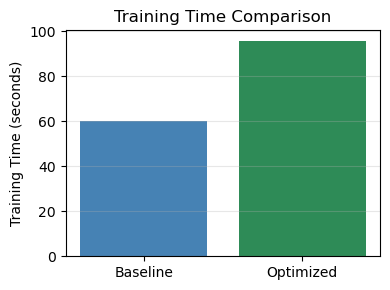

In [9]:
import matplotlib.pyplot as plt

# Plotting the training/validation loss vs. epoch during training.
times = [baseline_train_time, opt_time]
labels = ["Baseline", "Optimized"]

plt.figure(figsize=(4,3))
plt.bar(labels, times, color=["steelblue", "seagreen"])
plt.ylabel("Training Time (seconds)")
plt.title("Training Time Comparison")
plt.grid(axis="y", alpha=0.3)
plt.tight_layout()
plt.show()


**Comparison of Training and Validation Loss for the Optimzied Model**

*The below plot shows the comparison between Training and Validation Loss during training*

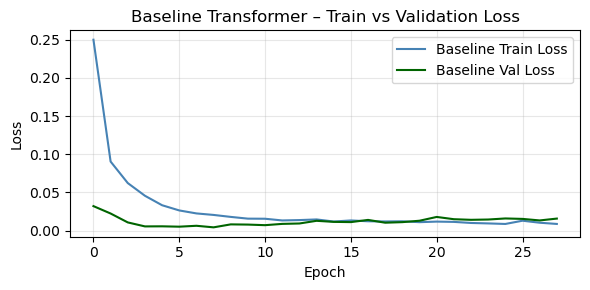

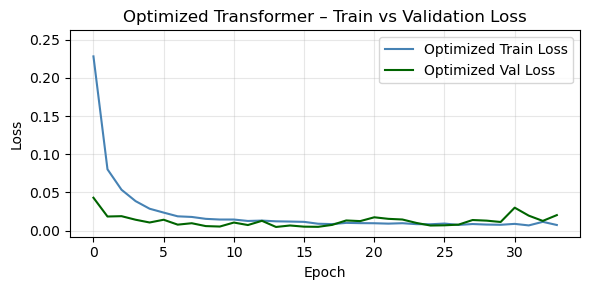

In [10]:
import matplotlib.pyplot as plt

# --- Compute shared y-axis limits ---
all_losses = (
    list(baseline_history.history["loss"]) +
    list(baseline_history.history["val_loss"]) +
    list(opt_history.history["loss"]) +
    list(opt_history.history["val_loss"])
)

y_min = min(all_losses)
y_max = max(all_losses)

padding = (y_max - y_min) * 0.05
y_min -= padding
y_max += padding

# Baseline Plot
plt.figure(figsize=(6,3))
plt.plot(baseline_history.history["loss"],     label="Baseline Train Loss", color="steelblue")
plt.plot(baseline_history.history["val_loss"], label="Baseline Val Loss",   color="darkgreen")

plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Baseline Transformer – Train vs Validation Loss")
plt.ylim(y_min, y_max)       
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Optimized Plot
plt.figure(figsize=(6,3))
plt.plot(opt_history.history["loss"],     label="Optimized Train Loss", color="steelblue")
plt.plot(opt_history.history["val_loss"], label="Optimized Val Loss",   color="darkgreen")

plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Optimized Transformer – Train vs Validation Loss")
plt.ylim(y_min, y_max)       
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()




**Optimized Model Metrics**

*After completing HPO, the accuracy, precison, f1-score, recall, and confusion matrix of the optimized model can be seen below.*

196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
Accuracy:  0.925
Precision: 0.9035
Recall:    0.9995
F1-score:  0.9491
ROC AUC:   0.9963

Confusion Matrix:
 [[1417  468]
 [   2 4383]]


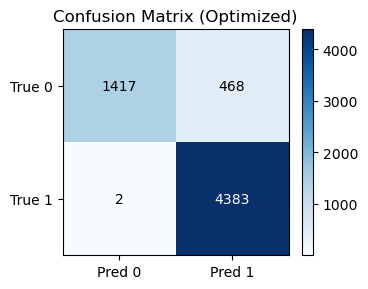

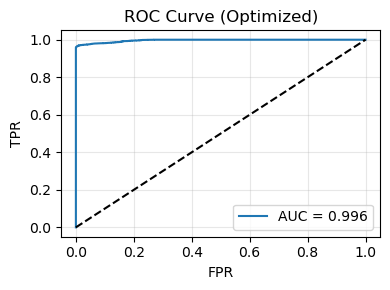

In [11]:
import numpy as np
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    roc_curve,
    auc,
)
import matplotlib.pyplot as plt

# Computing the optimized model's predictions on the test set.
y_prob_opt = opt_model.predict(X_test).ravel()
y_pred_opt = (y_prob_opt >= 0.5).astype(int)

# Calculating the metrics for the optimized model on the test set.
acc_opt     = accuracy_score(y_test, y_pred_opt)
prec_opt    = precision_score(y_test, y_pred_opt)
rec_opt     = recall_score(y_test, y_pred_opt)
f1_opt      = f1_score(y_test, y_pred_opt)
cm_opt      = confusion_matrix(y_test, y_pred_opt)

fpr_opt, tpr_opt, _ = roc_curve(y_test, y_prob_opt)
roc_auc_opt = auc(fpr_opt, tpr_opt)

print("Accuracy: ",  round(acc_opt, 4))
print("Precision:", round(prec_opt, 4))
print("Recall:   ", round(rec_opt, 4))
print("F1-score: ", round(f1_opt, 4))
print("ROC AUC:  ", round(roc_auc_opt, 4))
print("\nConfusion Matrix:\n", cm_opt)

# Comfusion Matrix Plot
plt.figure(figsize=(4,3))
plt.imshow(cm_opt, cmap="Blues")
plt.title("Confusion Matrix (Optimized)")
plt.colorbar(fraction=0.046, pad=0.04)
plt.xticks([0,1], ["Pred 0", "Pred 1"])
plt.yticks([0,1], ["True 0", "True 1"])
thresh = cm_opt.max() / 2
for i in range(2):
    for j in range(2):
        plt.text(j, i, cm_opt[i,j], ha='center', va='center',
                 color="white" if cm_opt[i,j] > thresh else "black")
plt.tight_layout()
plt.show()

# ROC Curve Plot
plt.figure(figsize=(4,3))
plt.plot(fpr_opt, tpr_opt, label=f"AUC = {roc_auc_opt:.3f}")
plt.plot([0,1], [0,1], "k--")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC Curve (Optimized)")
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()



**Final Comparison of Baseline vs. Optimized Transformer Models**

*The below plots show the effectiveness of our HPO performed on the Transformer Model for the CNC Toolwear Dataset.*

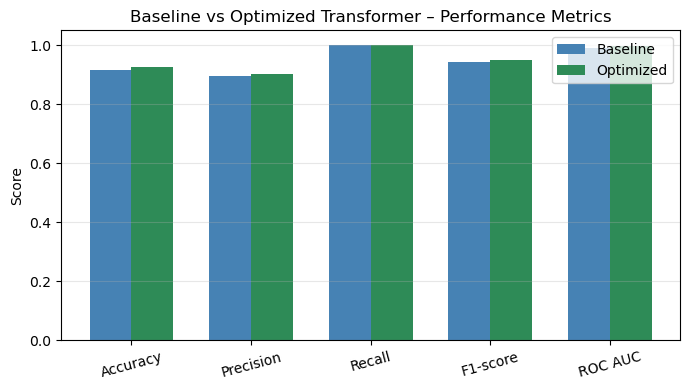

In [12]:
import matplotlib.pyplot as plt
import numpy as np

# Collect metrics into arrays
baseline_metrics  = [acc,      prec,      rec,      f1,      roc_auc]
optimized_metrics = [acc_opt,  prec_opt,  rec_opt,  f1_opt,  roc_auc_opt]
metric_names      = ["Accuracy", "Precision", "Recall", "F1-score", "ROC AUC"]

x = np.arange(len(metric_names))
width = 0.35  # bar width

plt.figure(figsize=(7,4))
plt.bar(x - width/2, baseline_metrics,  width, label="Baseline",  color="steelblue")
plt.bar(x + width/2, optimized_metrics, width, label="Optimized", color="seagreen")

plt.xticks(x, metric_names, rotation=15)
plt.ylabel("Score")
plt.ylim(0, 1.05)
plt.title("Baseline vs Optimized Transformer – Performance Metrics")
plt.legend()
plt.grid(axis="y", alpha=0.3)
plt.tight_layout()
plt.show()


**Overall Summary of Transformer Model Training**

After completing the training of our  Transformer Model.....

# Final Model Comparisons

# Current ROUGHWORK

In [17]:

import sys, os, importlib

# Allow imports from scripts/
sys.path.append(os.path.abspath("../scripts"))

import lstm_run
importlib.reload(lstm_run)


X_train, y_train, window_len, num_features = lstm_run.load_window_csv(
    "../data/data_windowed_csv/train_windows_w10.csv"
)

X_val, y_val, _, _ = lstm_run.load_window_csv(
    "../data/data_windowed_csv/val_windows_w10.csv"
)

X_test, y_test, _, _ = lstm_run.load_window_csv(
    "../data/data_windowed_csv/test_windows_w10.csv"
)

print("Train:", X_train.shape, y_train.shape)
print("Val:", X_val.shape, y_val.shape)
print("Test:", X_test.shape, y_test.shape)


model = lstm_run.build_lstm_model(window_len, num_features)
model.summary()

history = lstm_run.train_lstm(
    model,
    X_train, y_train,
    X_val, y_val,
    epochs=40,
    batch_size=32
)

preds, probs = lstm_run.predict_wear(model, X_test, threshold=0.3)

print("Shapes →", preds.shape, y_test.shape)

from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test, preds))
print(confusion_matrix(y_test, preds))



Train: (13271, 10, 20) (13271,)
Val: (4529, 10, 20) (4529,)
Test: (7324, 10, 20) (7324,)


ValueError: Cannot convert '10' to a shape.

TCN

In [1]:
import sys, os, importlib

SCRIPT_DIR = os.path.abspath("../scripts")
if SCRIPT_DIR not in sys.path:
    sys.path.insert(0, SCRIPT_DIR)

import tcn_run
importlib.reload(tcn_run)


<module 'tcn_run' from 'c:\\Users\\sharl\\Desktop\\4010 Final Project\\CNC-Tool-Wear-1\\scripts\\tcn_run.py'>

In [2]:
import tcn_run
import importlib
importlib.reload(tcn_run)

results = tcn_run.run_tcn_experiment(
    "../data/data_windowed_csv/train_windows_w10.csv",
    "../data/data_windowed_csv/val_windows_w10.csv",
    "../data/data_windowed_csv/test_windows_w10.csv",
    max_epochs=25
) \

print("Best TCN config:", results["best_config"])


Loading datasets...
Shapes:
  X_train: (13832, 10, 25) y_train: (13832,)
  X_val: (5022, 10, 25) y_val: (5022,)
  X_test: (6270, 10, 25) y_test: (6270,)

=== TCN Config 1/6 ===
{'filters': 32, 'kernel_size': 2, 'dropout': 0.2, 'lr': 0.001, 'batch': 64}

Best val_auc: 0.9999

=== TCN Config 2/6 ===
{'filters': 32, 'kernel_size': 3, 'dropout': 0.3, 'lr': 0.001, 'batch': 64}
Best val_auc: 1.0000

=== TCN Config 3/6 ===
{'filters': 64, 'kernel_size': 2, 'dropout': 0.2, 'lr': 0.001, 'batch': 64}
Best val_auc: 1.0000

=== TCN Config 4/6 ===
{'filters': 64, 'kernel_size': 3, 'dropout': 0.3, 'lr': 0.0003, 'batch': 64}
Best val_auc: 1.0000

=== TCN Config 5/6 ===
{'filters': 64, 'kernel_size': 5, 'dropout': 0.3, 'lr': 0.001, 'batch': 32}
Best val_auc: 1.0000

=== TCN Config 6/6 ===
{'filters': 128, 'kernel_size': 3, 'dropout': 0.4, 'lr': 0.0003, 'batch': 64}
Best val_auc: 0.9999

=== Finished TCN Search ===
Best config: {'filters': 64, 'kernel_size': 2, 'dropout': 0.2, 'lr': 0.001, 'batch': 64}